## Minimal notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# explore original json
db=pd.read_json('data/inspire_LA.json')
db.head()

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1030697,"{'value': 'Vasconcellos, Cesar Augusto Zen', '...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'C.A.Z.Vasconcellos.1', 'schema': '...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
1,1259398,"{'value': 'Hess, Peter Otto', 'preferred_name'...",903003,"[{'value': 'grid.9486.3', 'schema': 'GRID'}, {...",Mexico,Mexico U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'P.O.Hess.1', 'schema': 'INSPIRE BA...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
2,1007059,"{'value': 'Hadjimichef, Dimiter', 'preferred_n...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,"[{'value': 'dimiter.hadjimichef@ufrgs.br', 'cu...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0003-4999-7625', 'schema': 'O...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
3,1030698,"{'value': 'Bodmann, B.E.J.', 'preferred_name':...",906126,"[{'value': 'INST-43427', 'schema': 'SPIRES'}]",Brazil,"Santa Maria U., Brazil",[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'B.E.J.Bodmann.1', 'schema': 'INSPI...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
4,1969239,"{'value': 'Razeira, Moisés'}",911369,"[{'value': 'INST-102865', 'schema': 'SPIRES'}]",Brazil,"Alegrete, Brazil",[],[],"[{'value': 'M.Razeira.1', 'schema': 'INSPIRE B...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."


In [153]:
# find all countries in json
LA_countries = db['country'].unique()
for country in LA_countries:
    print(country)
    
# format country 
def format_country(country):
    country = country.lower()
    ans = country.replace(" ", "_")
    return ans

Brazil
Mexico
Venezuela
Chile
Argentina
Peru
Colombia
Cuba
Costa Rica
Ecuador
Uruguay
Guatemala
Bolivia
Paraguay
Honduras


In [3]:
def generate_dataframe(country):
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    dp['year'] = pd.to_numeric(dp['year'])
    df_country= dp[(dp['year']!='None') & (dp['year'] >= 1900)]['year'].value_counts().sort_index()
    df_country = pd.DataFrame({'year':df_country.index, country:df_country.values})
    return df_country

In [4]:
def all_dataframes(countries):
    for country in countries:
        ans = generate_dataframe(country)
    pass

In [5]:
df_argentina = generate_dataframe('Argentina')
df_bolivia = generate_dataframe('Bolivia')
df_brazil = generate_dataframe('Brazil')
df_chile = generate_dataframe('Chile')
df_colombia = generate_dataframe('Colombia')
df_costa_rica = generate_dataframe('Costa Rica')
df_cuba = generate_dataframe('Cuba')
df_ecuador = generate_dataframe('Ecuador')
df_guatemala = generate_dataframe('Guatemala')
df_honduras = generate_dataframe('Honduras')
df_mexico = generate_dataframe('Mexico')
df_paraguay = generate_dataframe('Paraguay')
df_peru = generate_dataframe('Peru')
df_uruguay = generate_dataframe('Uruguay')
df_venezuela = generate_dataframe('Venezuela')

In [6]:
df_combined = df_argentina.set_index('year').join(df_bolivia.set_index('year'))
df_combined = df_combined.join(df_brazil.set_index('year'))
df_combined = df_combined.join(df_chile.set_index('year'))
df_combined = df_combined.join(df_colombia.set_index('year'))
df_combined = df_combined.join(df_costa_rica.set_index('year'))
df_combined = df_combined.join(df_cuba.set_index('year'))
df_combined = df_combined.join(df_ecuador.set_index('year'))
df_combined = df_combined.join(df_guatemala.set_index('year'))
df_combined = df_combined.join(df_honduras.set_index('year'))
df_combined = df_combined.join(df_mexico.set_index('year'))
df_combined = df_combined.join(df_paraguay.set_index('year'))
df_combined = df_combined.join(df_peru.set_index('year'))
df_combined = df_combined.join(df_uruguay.set_index('year'))
df_combined = df_combined.join(df_venezuela.set_index('year'))

df_combined = df_combined.fillna(0).astype(int)

df_combined.head(10)


,Argentina,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Ecuador,Guatemala,Honduras,Mexico,Paraguay,Peru,Uruguay,Venezuela
year,,,,,,,,,,,,,,,
1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1966,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1967,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1968,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0
1969,3,1,11,1,0,0,0,0,0,0,1,0,0,0,1
1970,7,0,16,3,0,0,0,0,0,0,5,0,0,0,0
1971,11,0,13,4,0,0,0,0,0,0,10,0,0,0,2
1972,17,0,11,5,1,0,0,0,0,0,5,0,0,1,3
1973,10,0,16,2,0,0,0,0,0,0,4,0,0,0,0


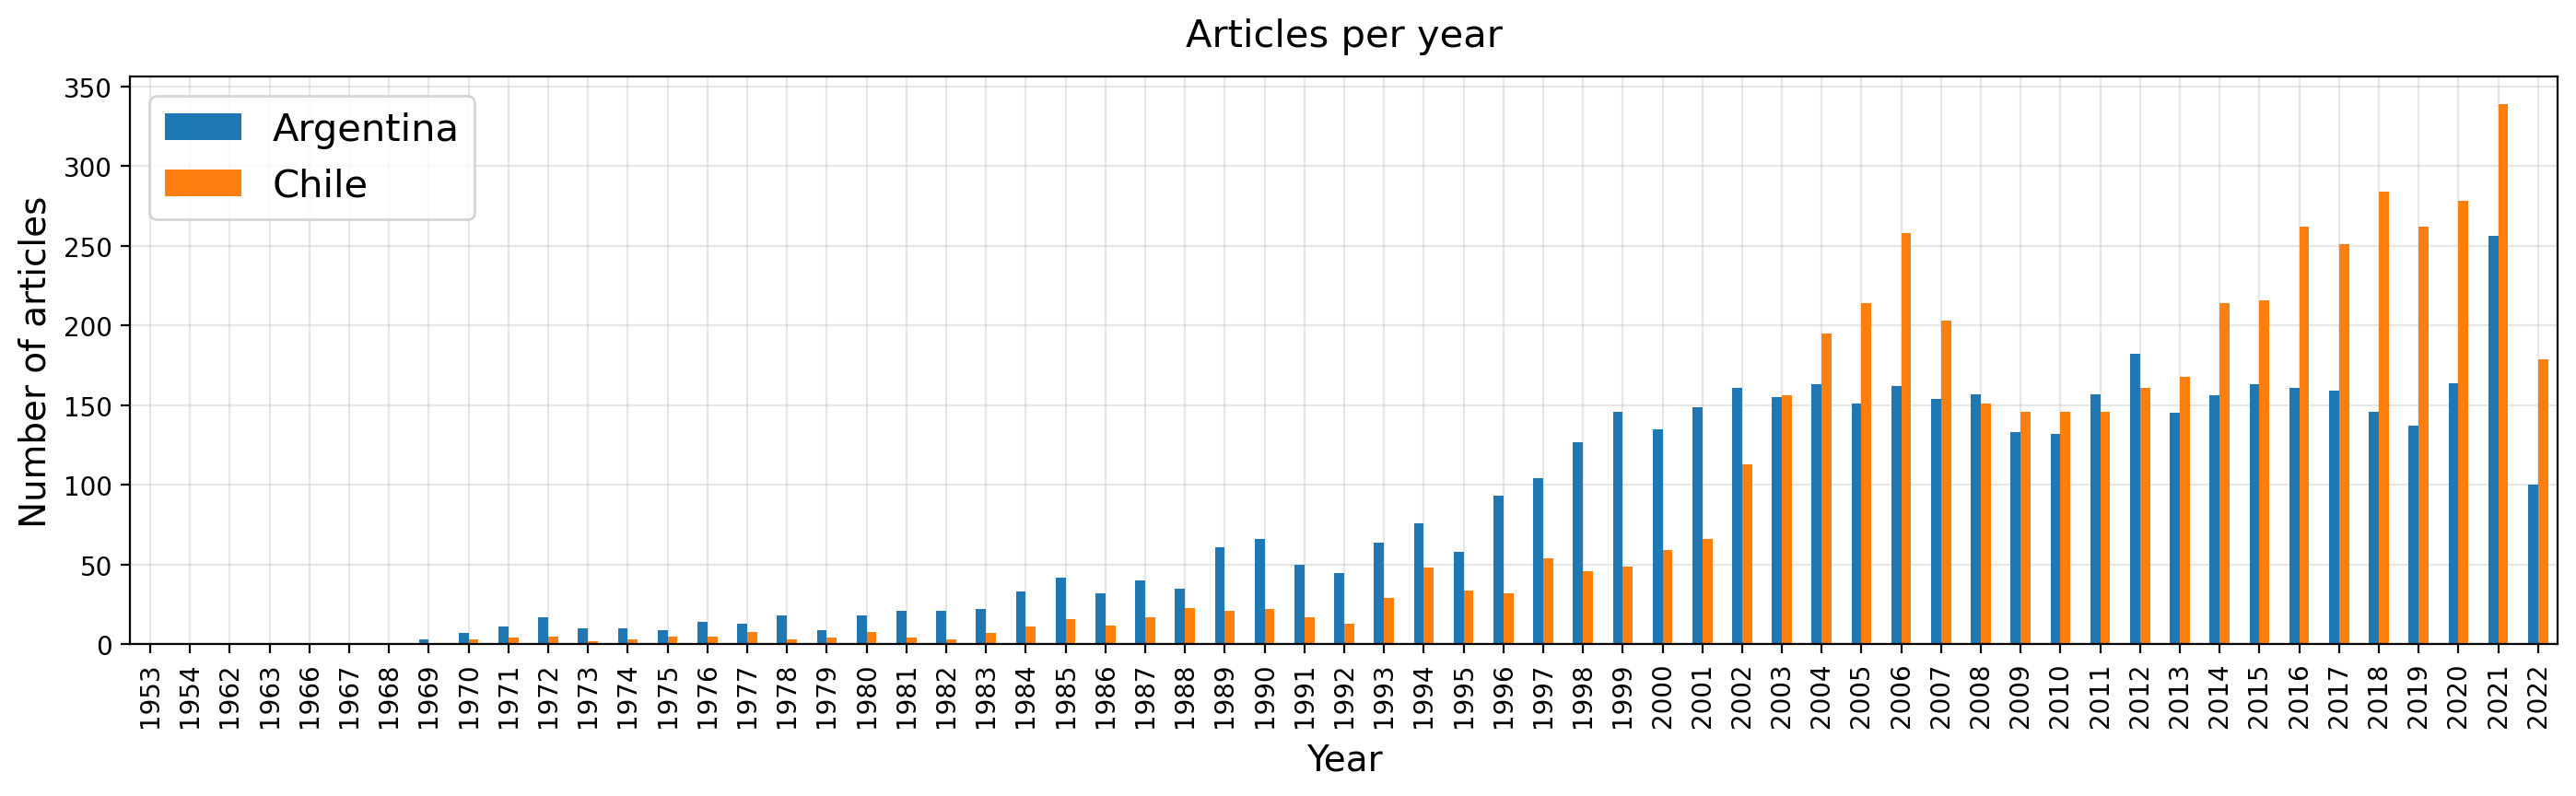

In [158]:
# initialise plot for combination 1

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Argentina', 'Chile'], kind='bar', ax=ax)



ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_1.pdf', dpi=150, bbox_inches = 'tight')

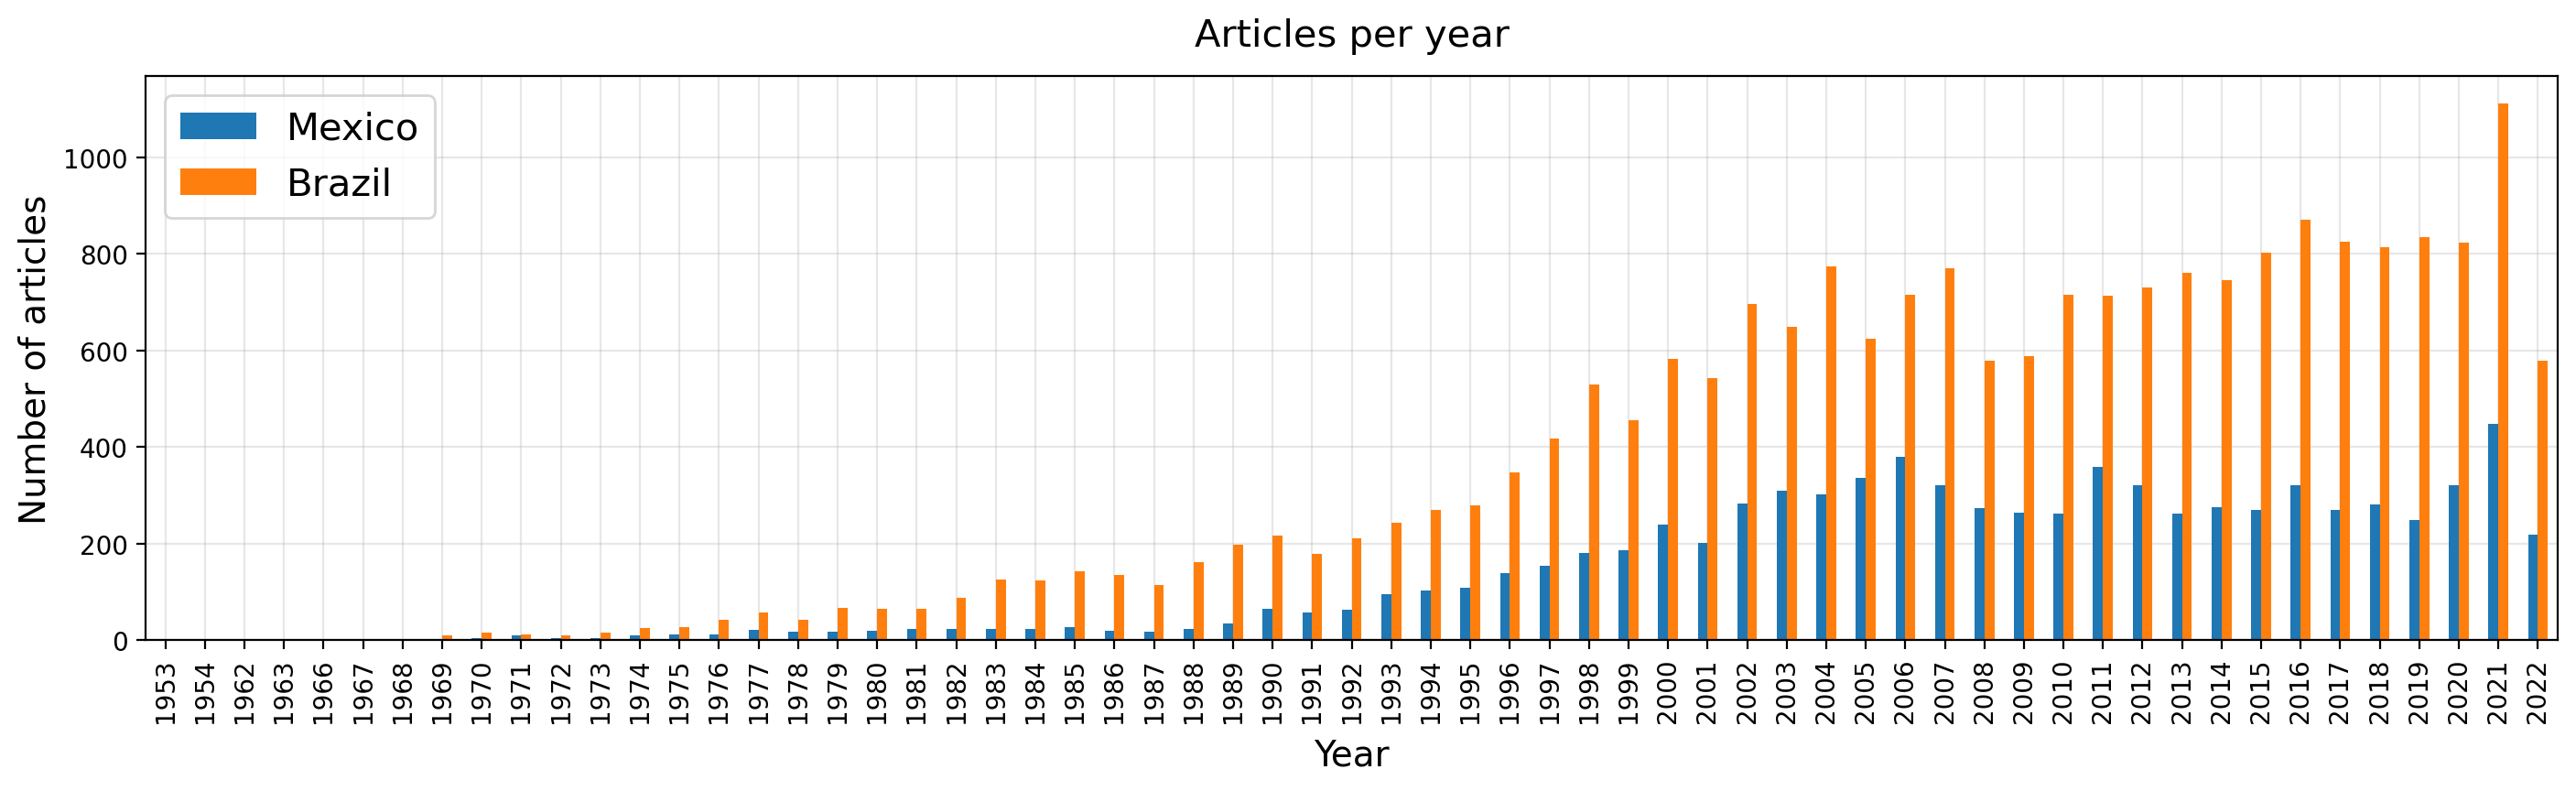

In [159]:
# initialise plot for combination 2

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Mexico', 'Brazil'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_2.pdf', dpi=150, bbox_inches = 'tight')

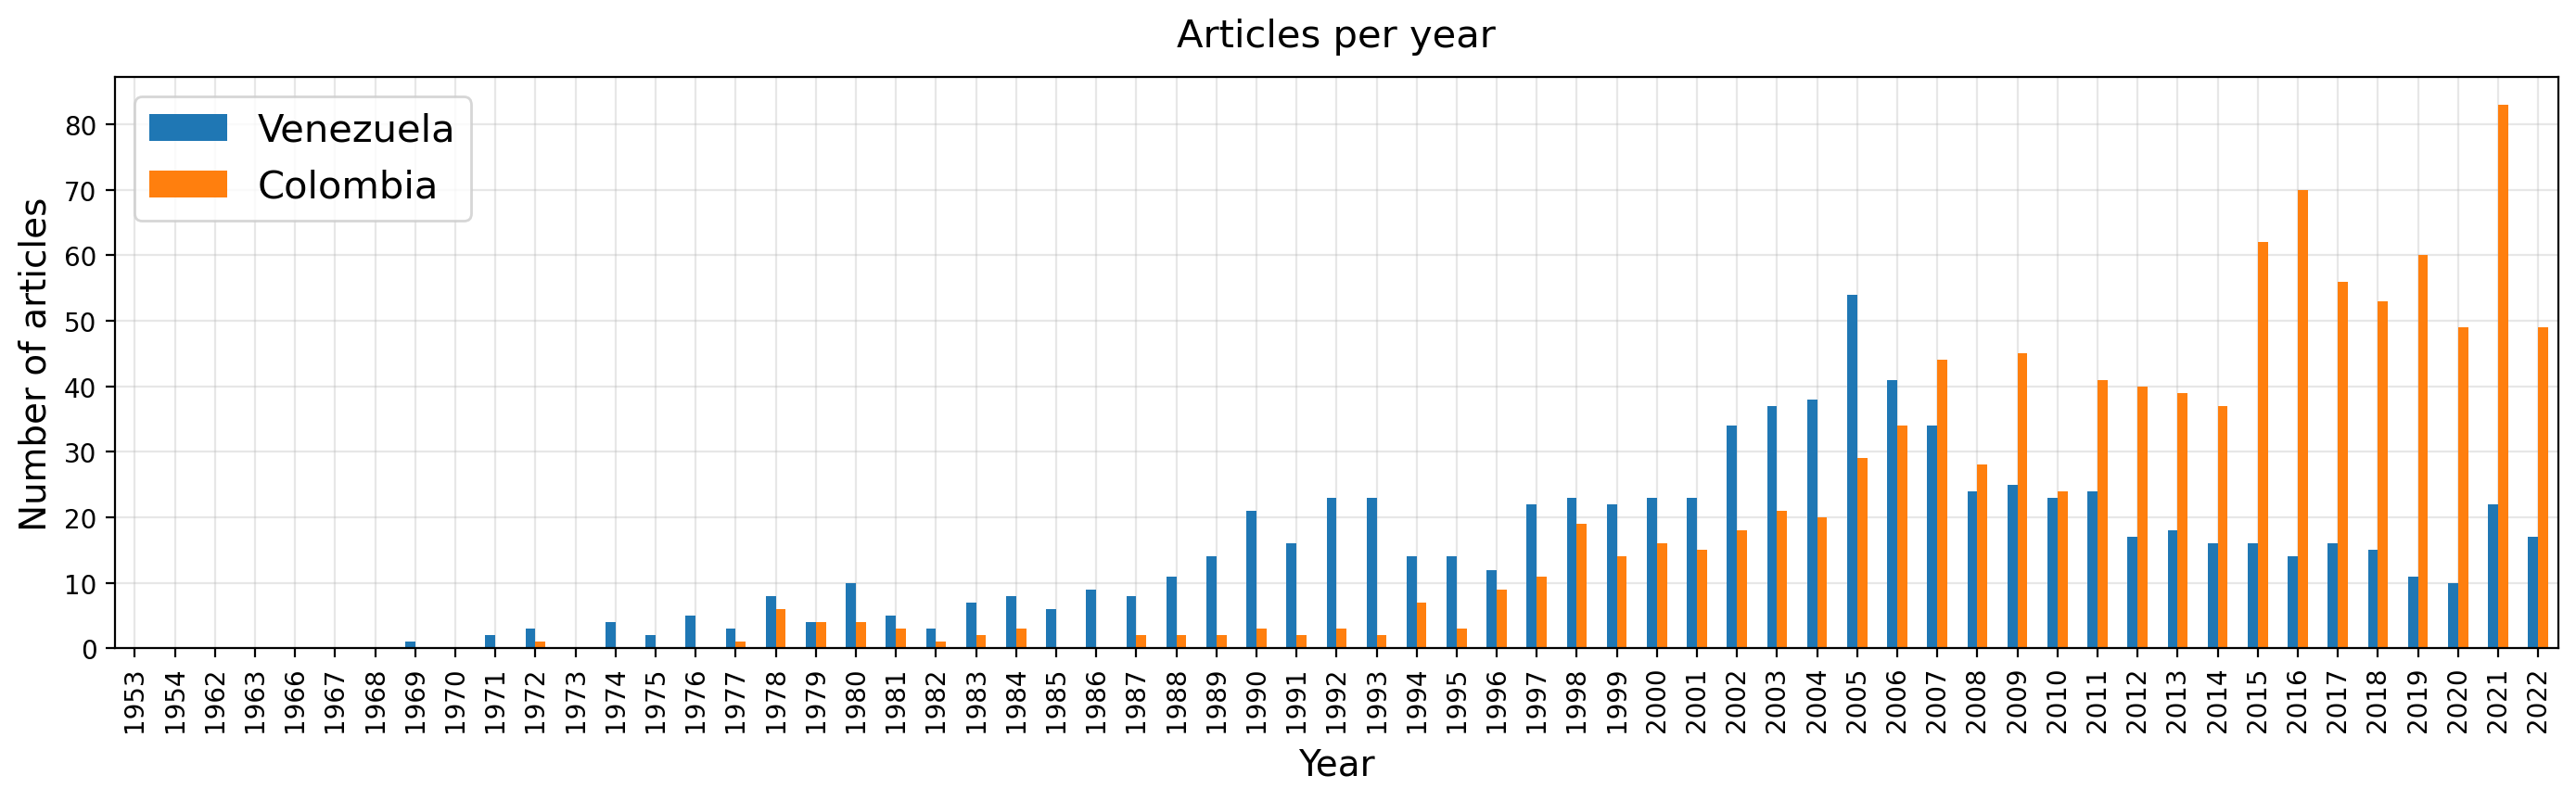

In [160]:
# initialise plot for combination 3

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Venezuela', 'Colombia'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_3.pdf', dpi=150, bbox_inches = 'tight')

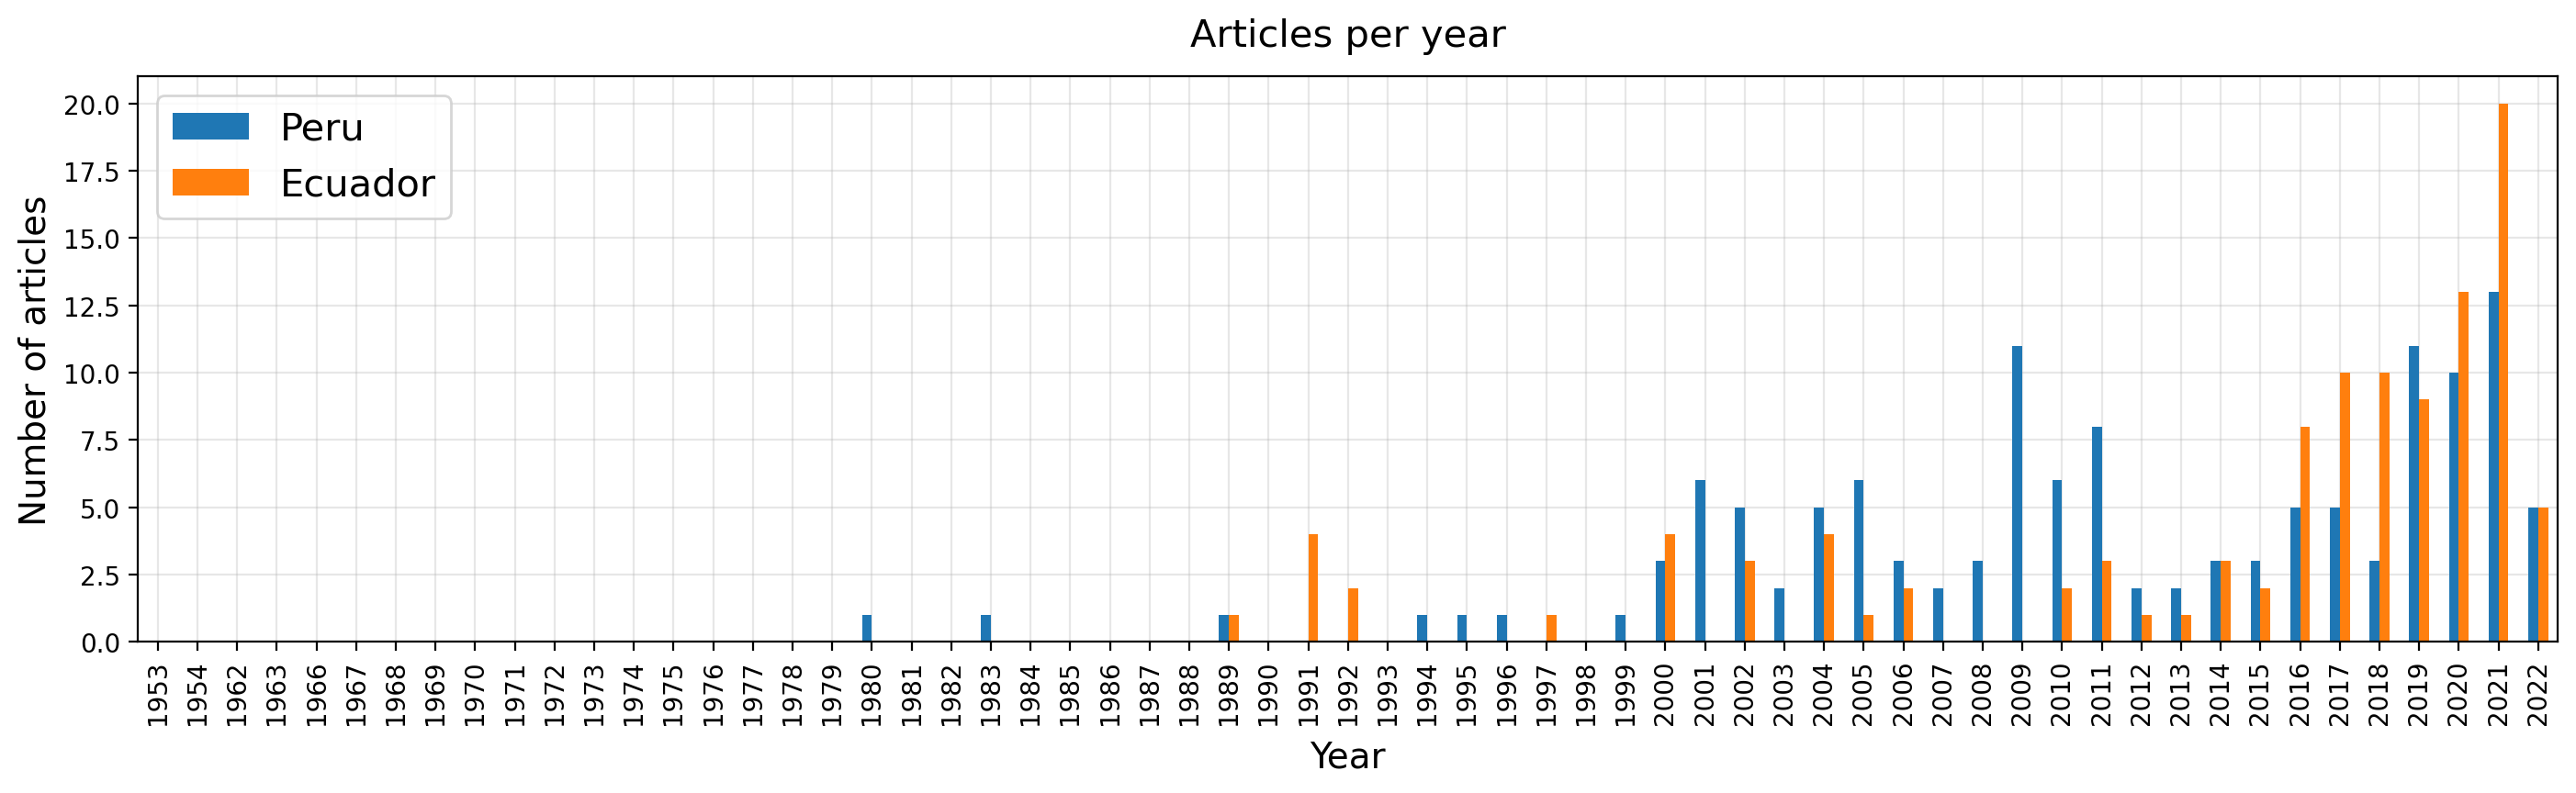

In [161]:
# initialise plot for combination 4

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Peru', 'Ecuador'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_4.pdf', dpi=150, bbox_inches = 'tight')

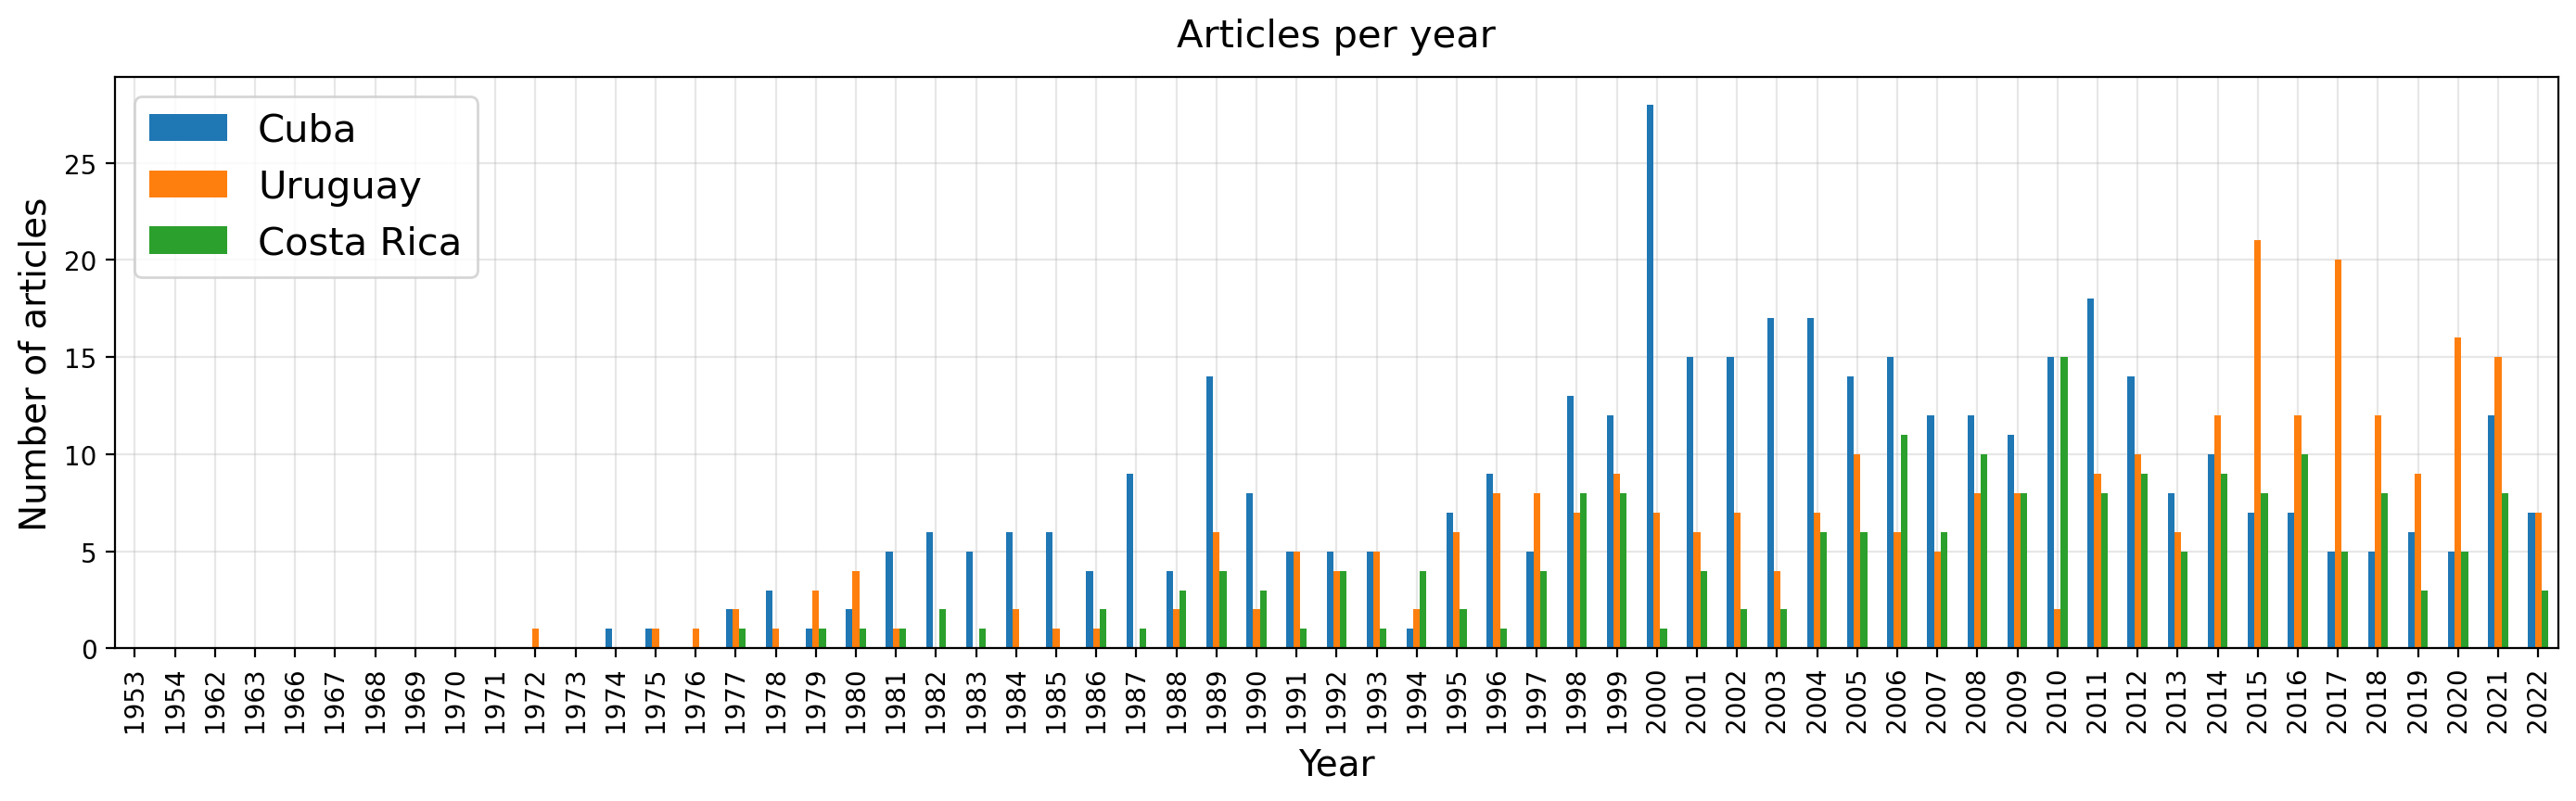

In [162]:
# initialise plot for combination 5

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Cuba', 'Uruguay', 'Costa Rica'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_5.pdf', dpi=150, bbox_inches = 'tight')

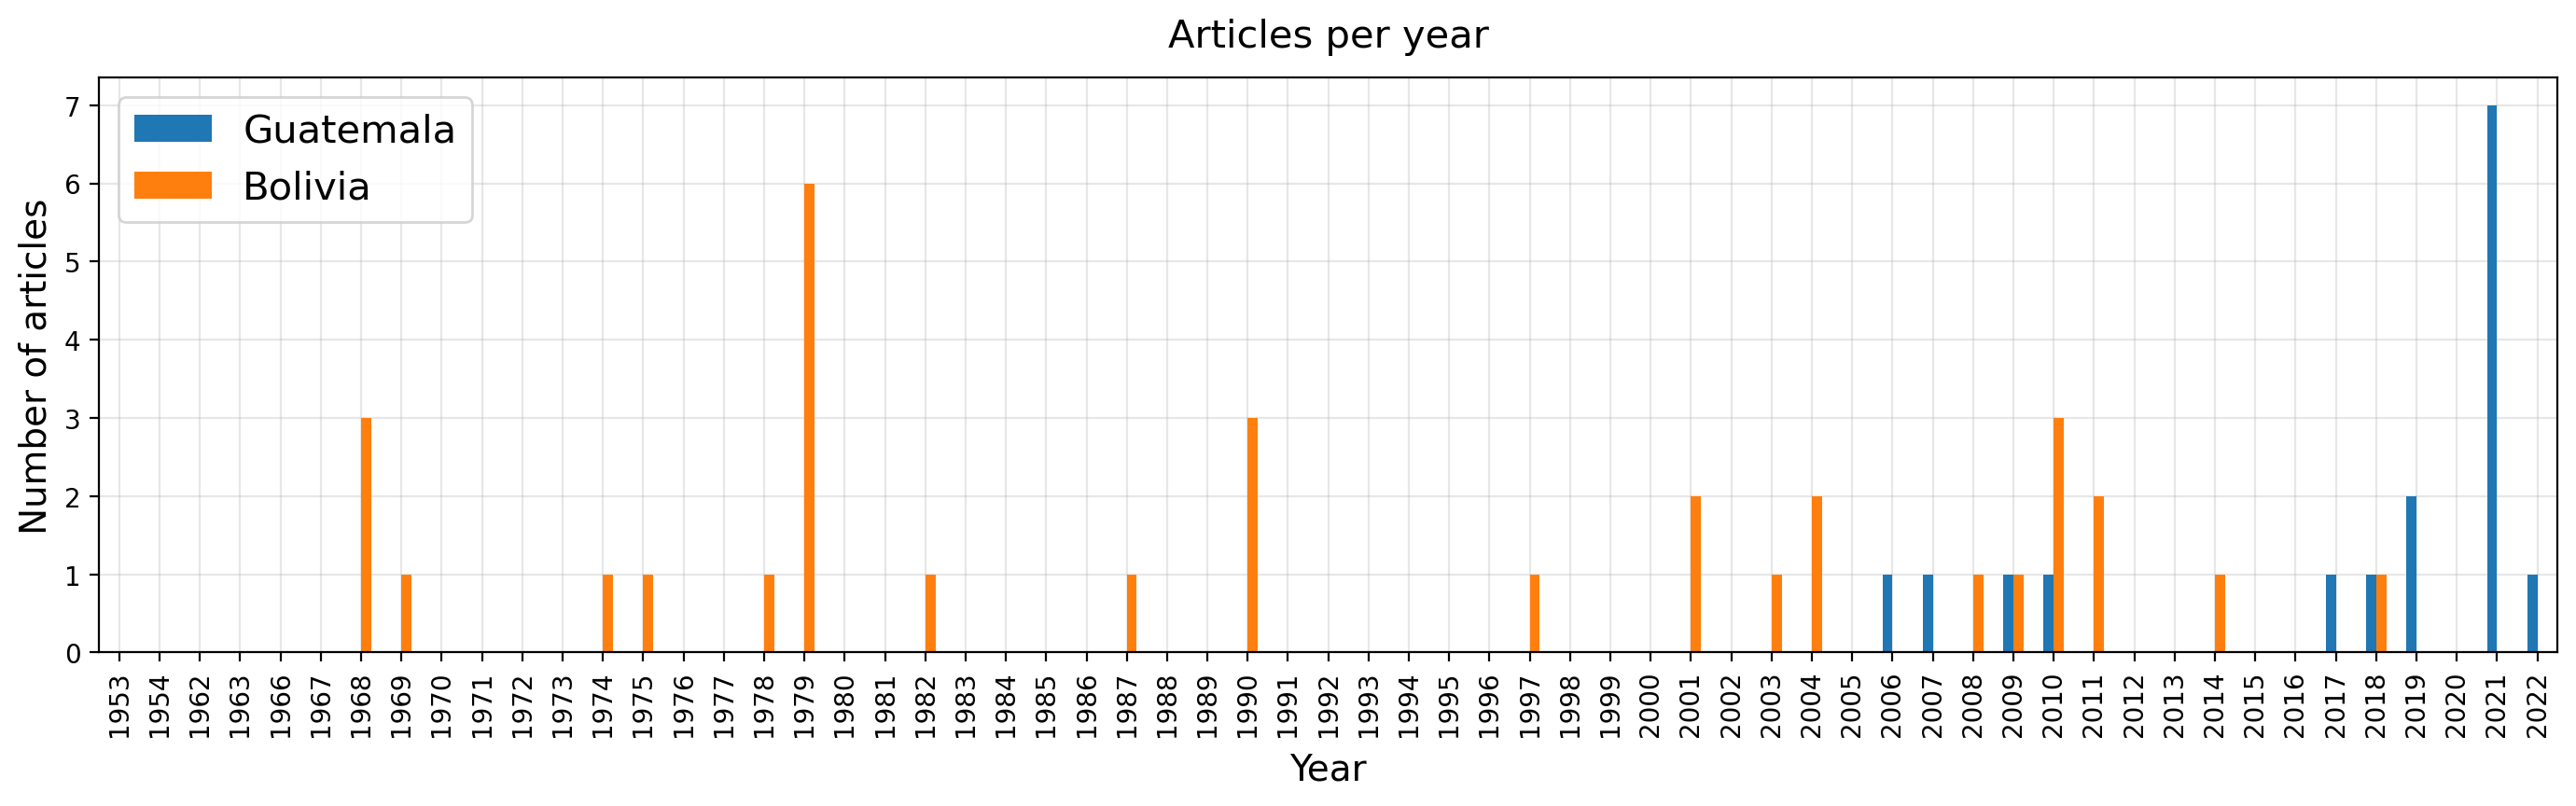

In [163]:
# initialise plot for combination 6

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Guatemala', 'Bolivia'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_6.pdf', dpi=150, bbox_inches = 'tight')

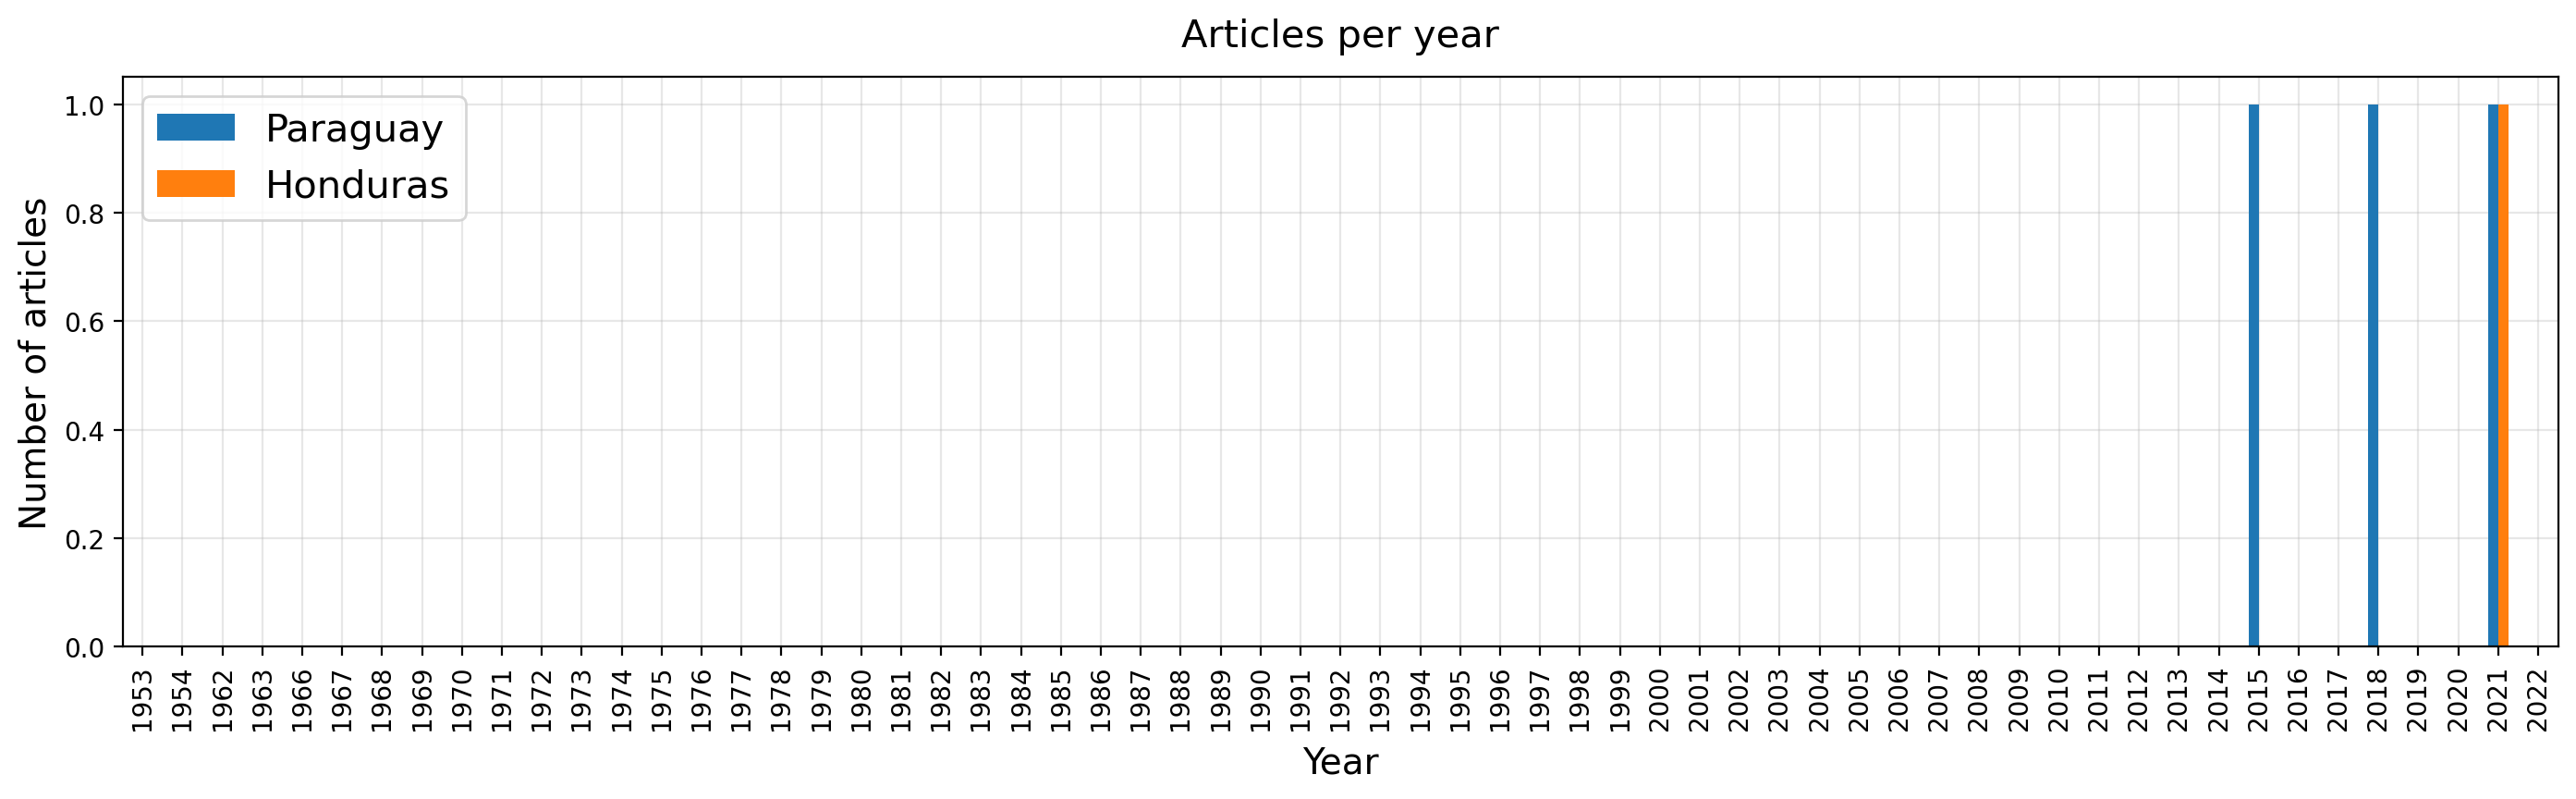

In [164]:
# initialise plot for combination 7

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Paraguay', 'Honduras'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_7.pdf', dpi=150, bbox_inches = 'tight')

In [165]:
db=pd.read_json('data/inspire_LA.json')
db.head()

# list of the countries in the file
list_of_countries = db['country'].tolist()
list_of_countries = list(dict.fromkeys(list_of_countries))
print(list_of_countries)

['Brazil', 'Mexico', 'Venezuela', 'Chile', 'Argentina', 'Peru', 'Colombia', 'Cuba', 'Costa Rica', 'Ecuador', 'Uruguay', 'Guatemala', 'Bolivia', 'Paraguay', 'Honduras']


In [166]:
def plot_articles_per_year(name_of_country):
    """
    This is a function
    """
    db=pd.read_json('data/inspire_LA.json',dtype={'institution_id':int})
    db=db[db['country']==name_of_country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    # map the years to numerical values
    dp['year'] = pd.to_numeric(dp['year'])
    fig, ax = plt.subplots(figsize=(10,3))
    dp[(dp['year']!='None') & (dp['year'] >= 1900)]['year'].value_counts().sort_index().plot(kind='bar')
    ax.set_title(f'Articles from {name_of_country} with up to 10 authors', size=15)
    ax.set_xlabel('Year', size=15, labelpad=6)
    ax.set_ylabel('Number of articles', size=15)
    ax.set_axisbelow(True)
    ax.grid(True)
    fig.savefig(f'articles_countries_per_year/articles_{name_of_country}_per_year.pdf', dpi=150, bbox_inches = 'tight')

In [167]:
LA_countries = ['Brazil', 'Mexico', 'Venezuela', 'Chile', 'Argentina', 
                'Peru', 'Colombia', 'Cuba', 'Costa Rica', 'Ecuador',
                'Uruguay', 'Guatemala', 'Bolivia', 'Paraguay', 'Honduras']

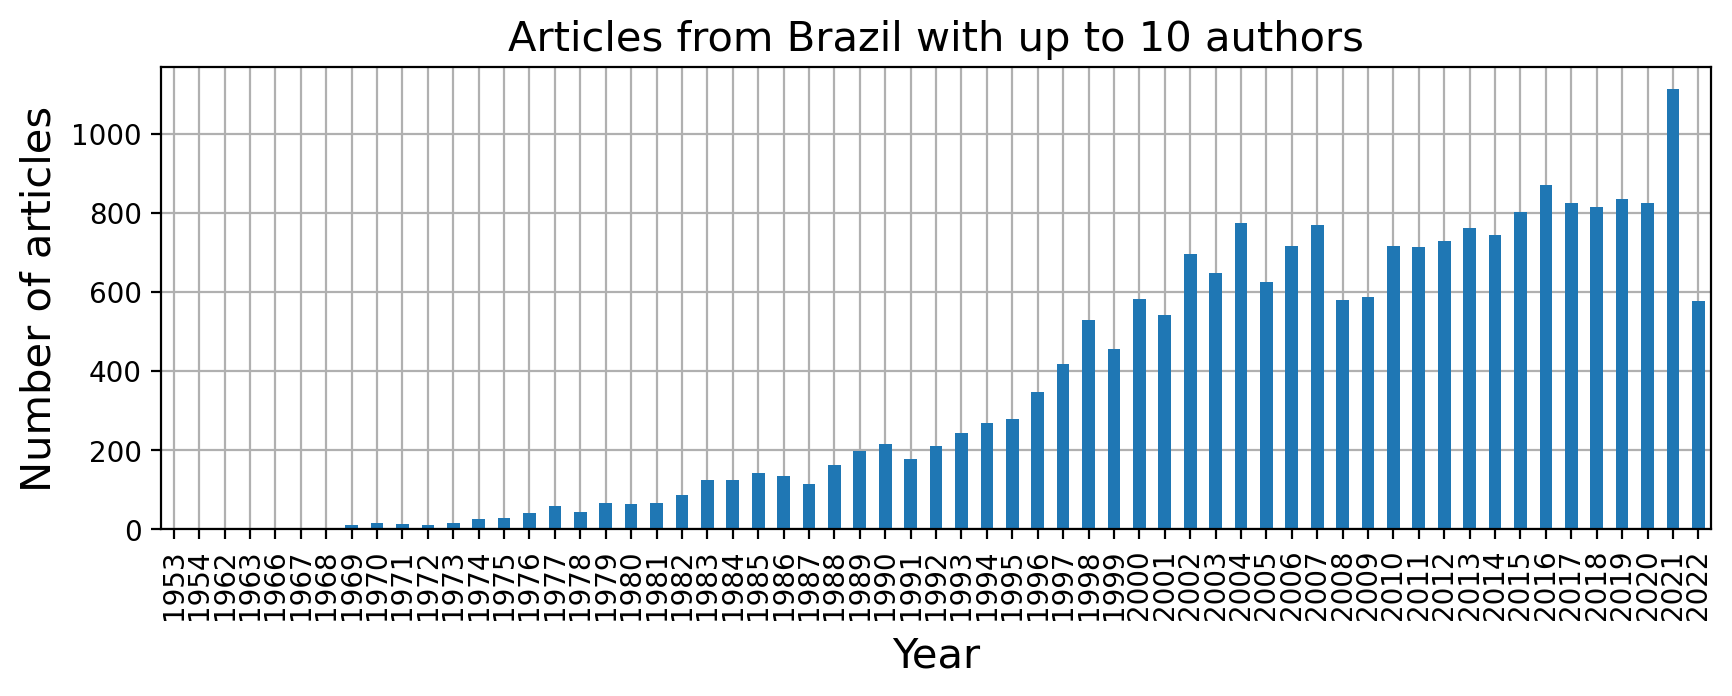

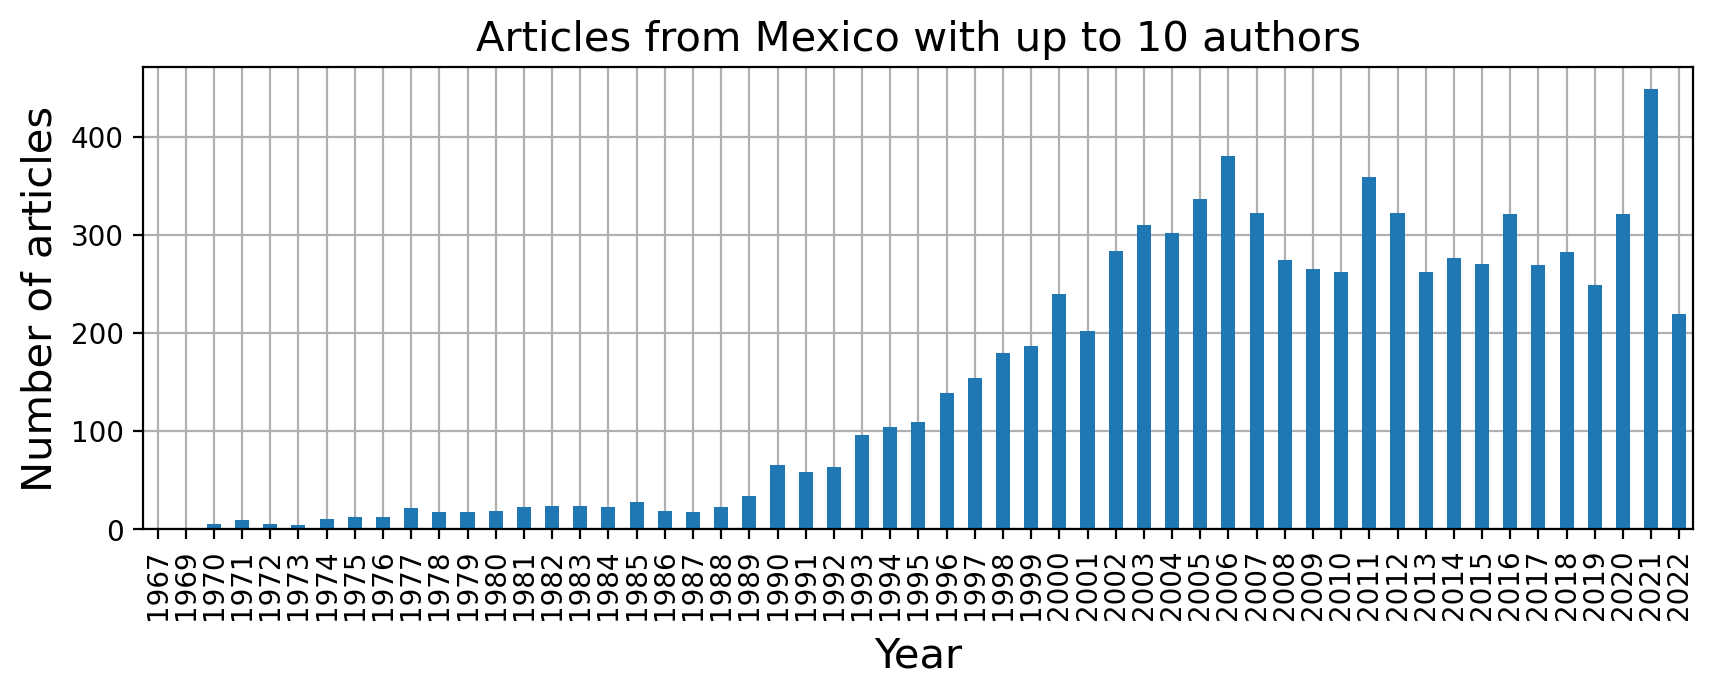

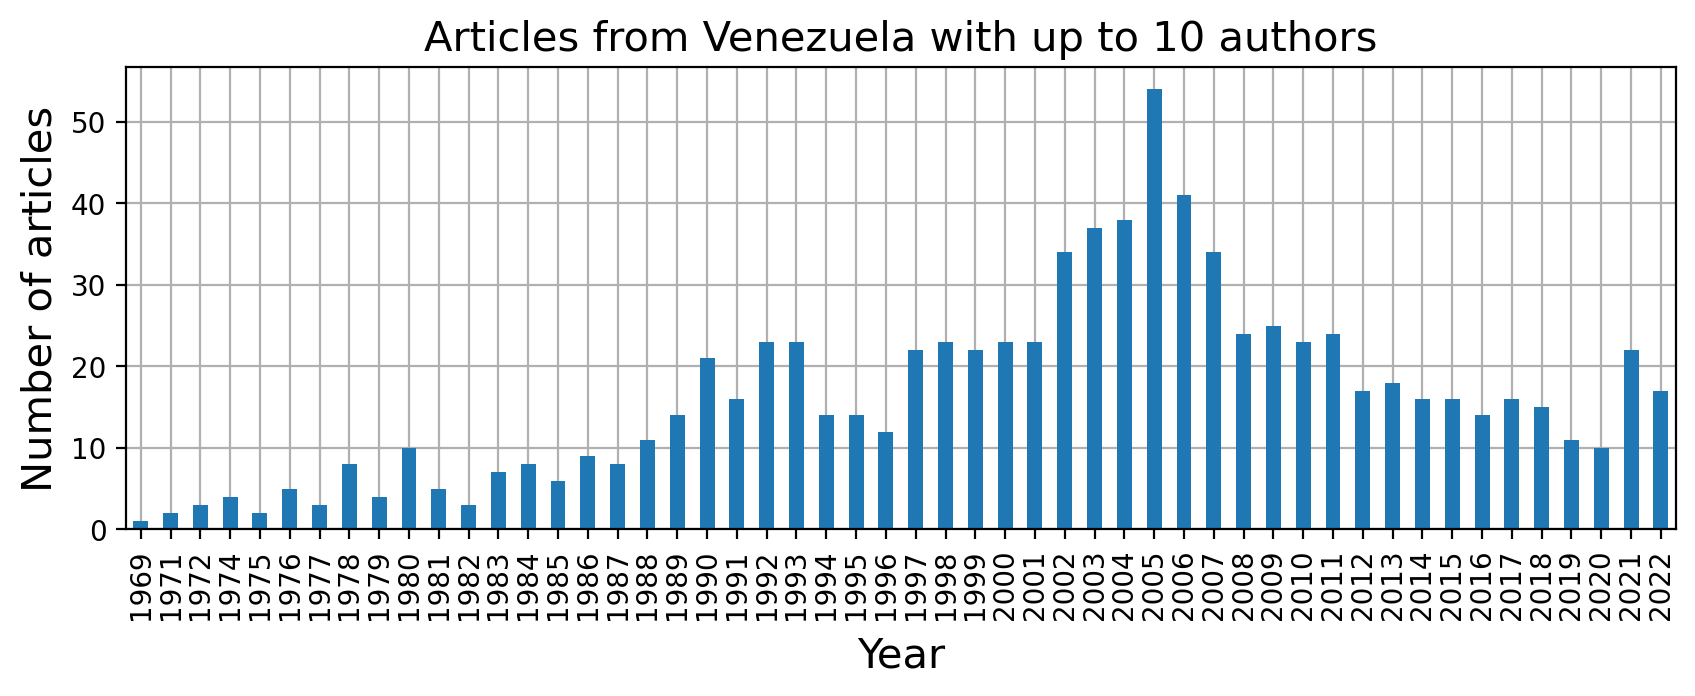

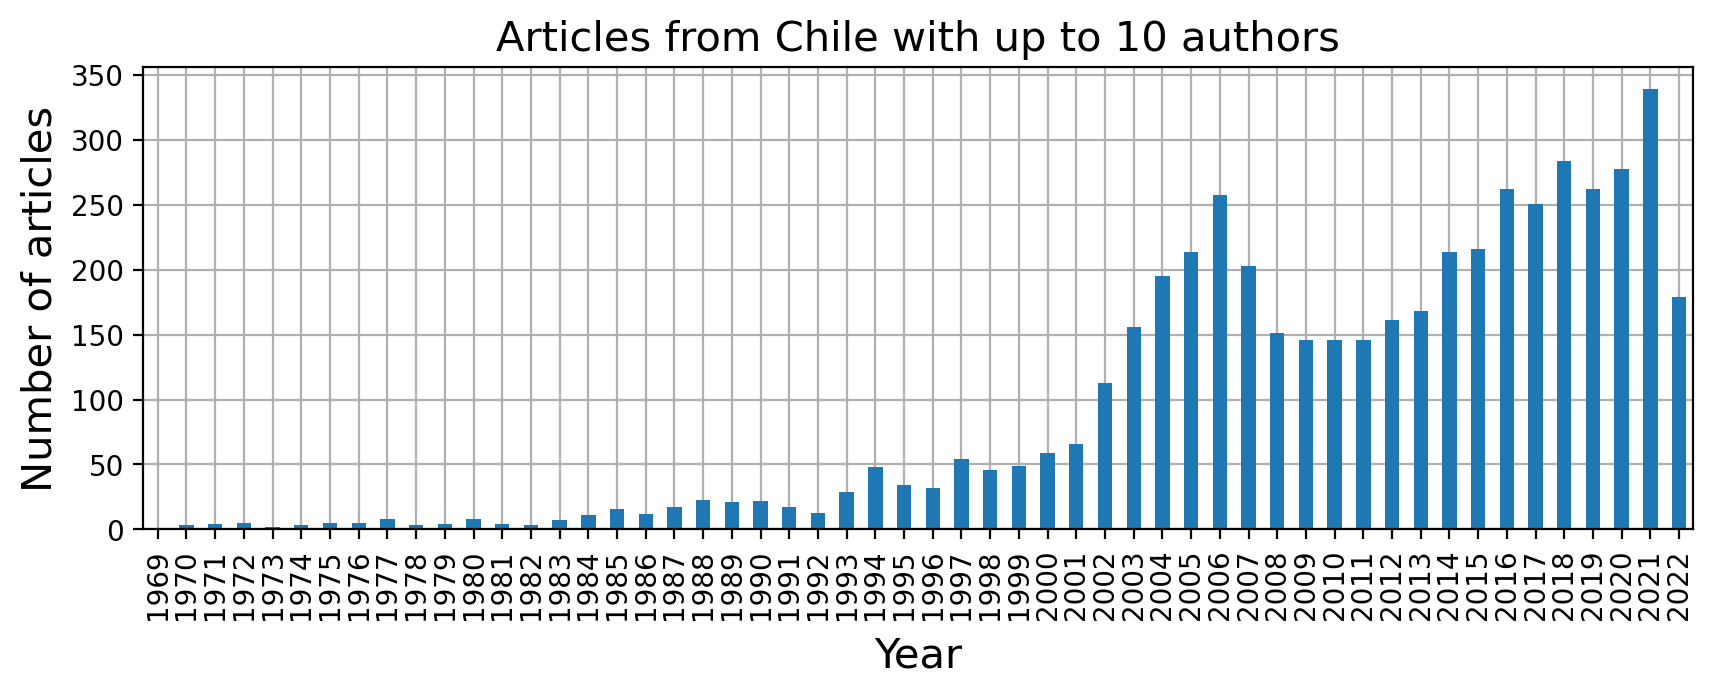

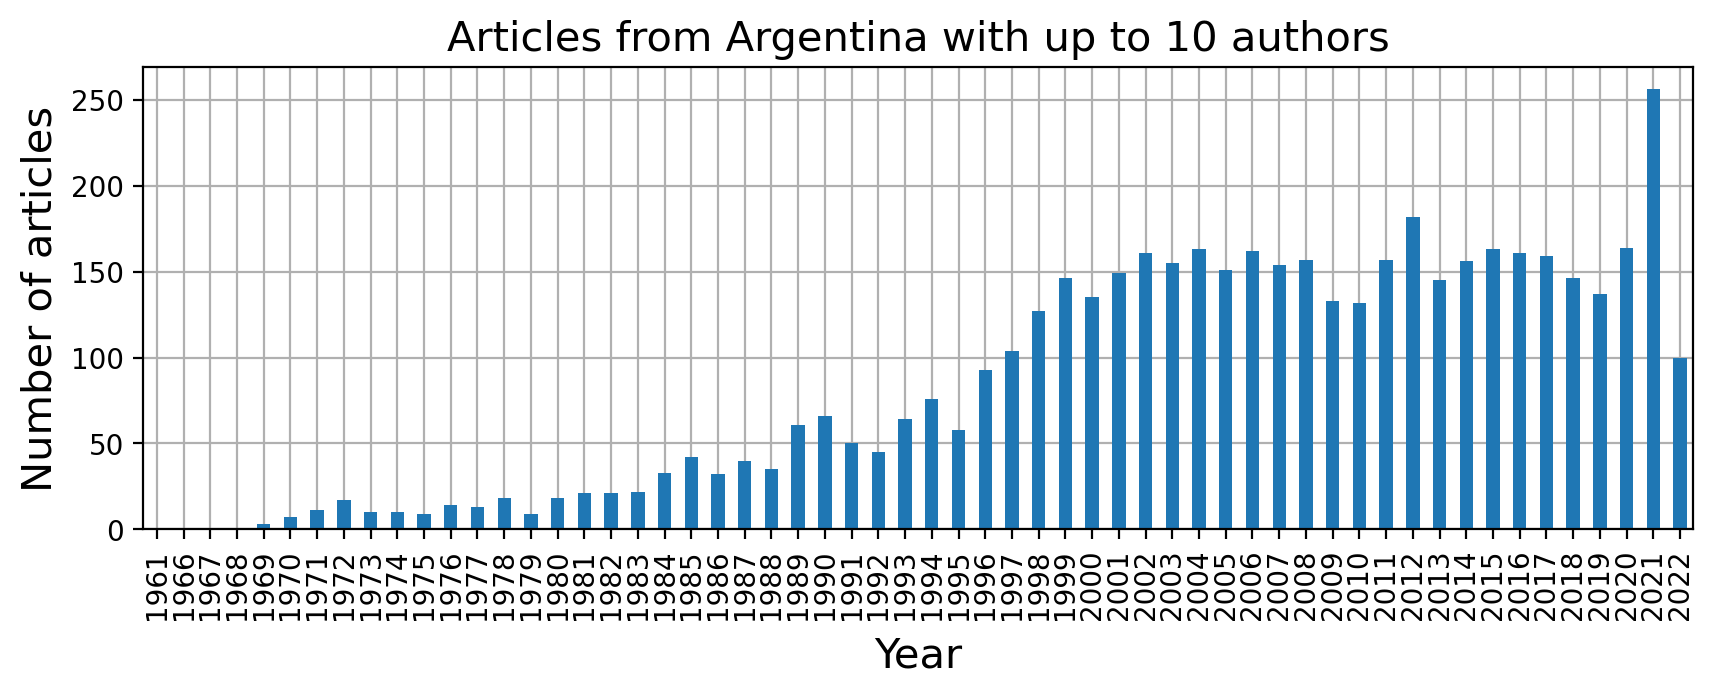

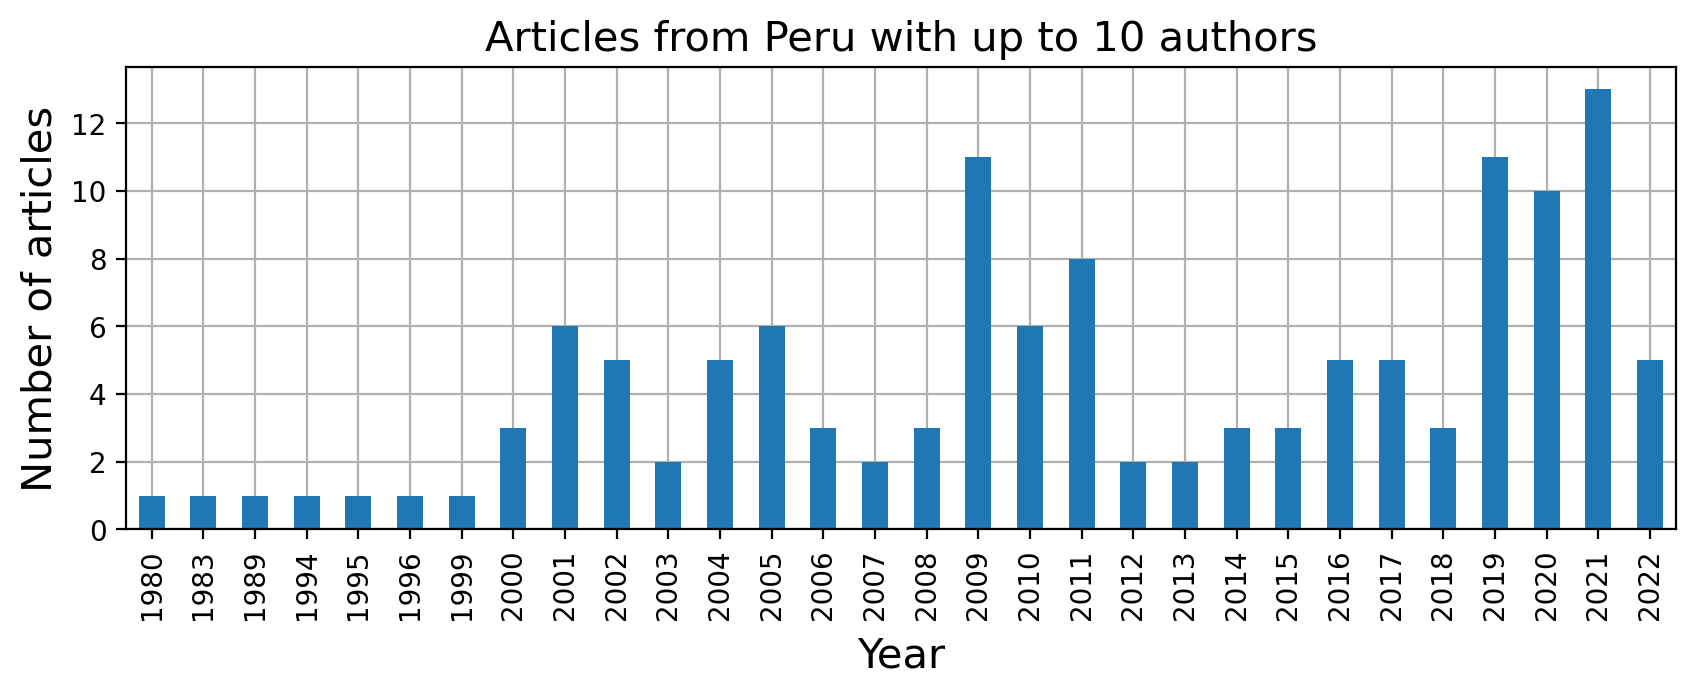

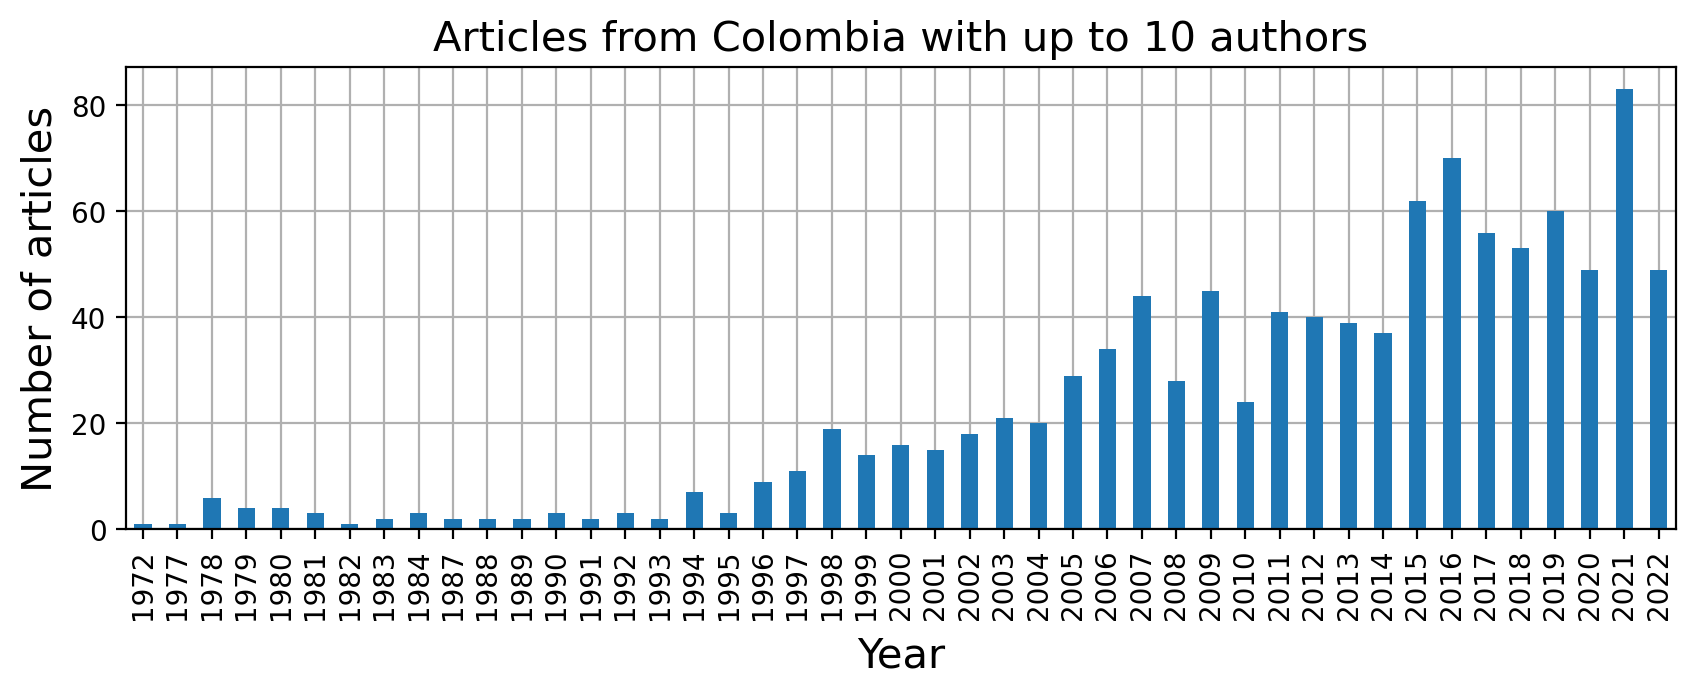

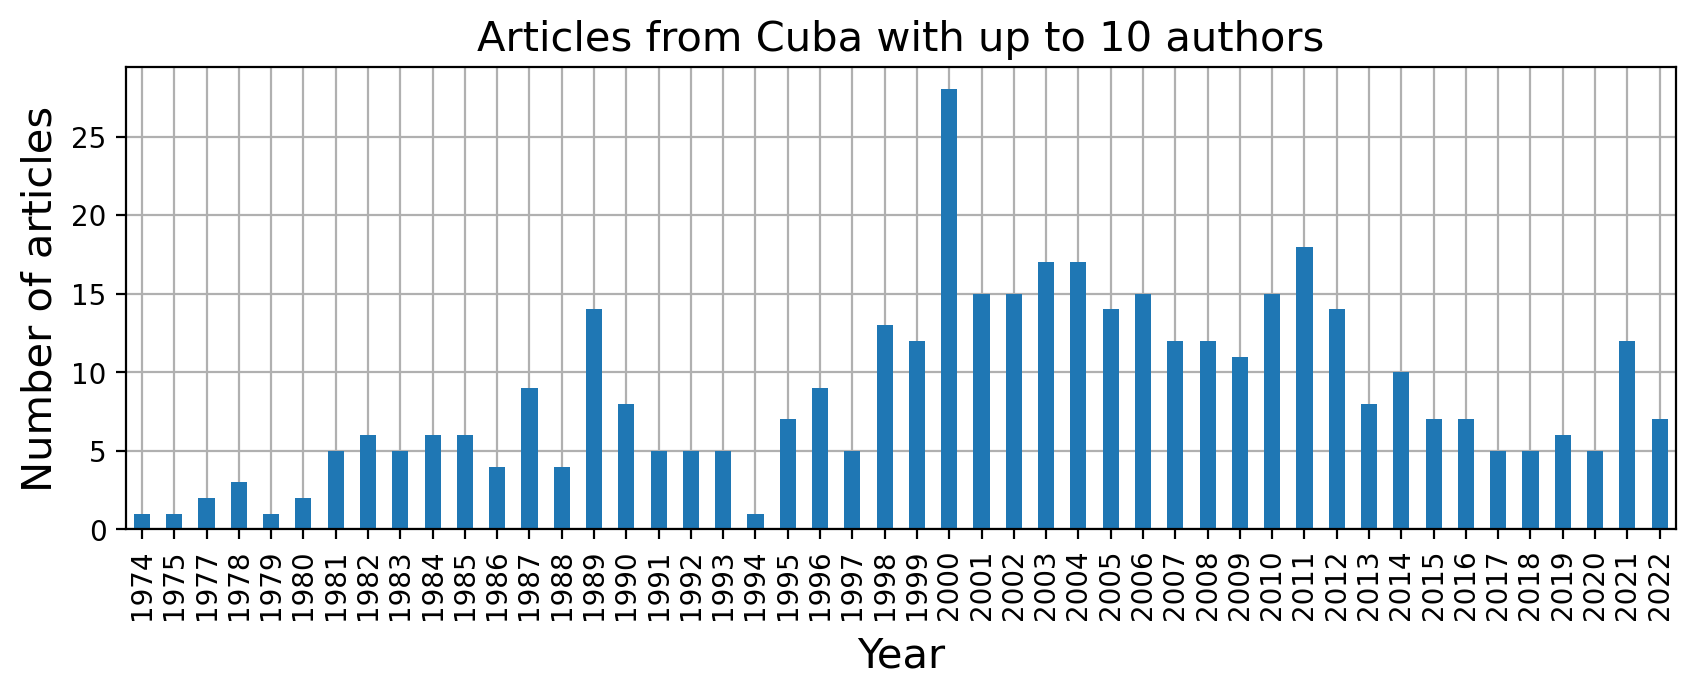

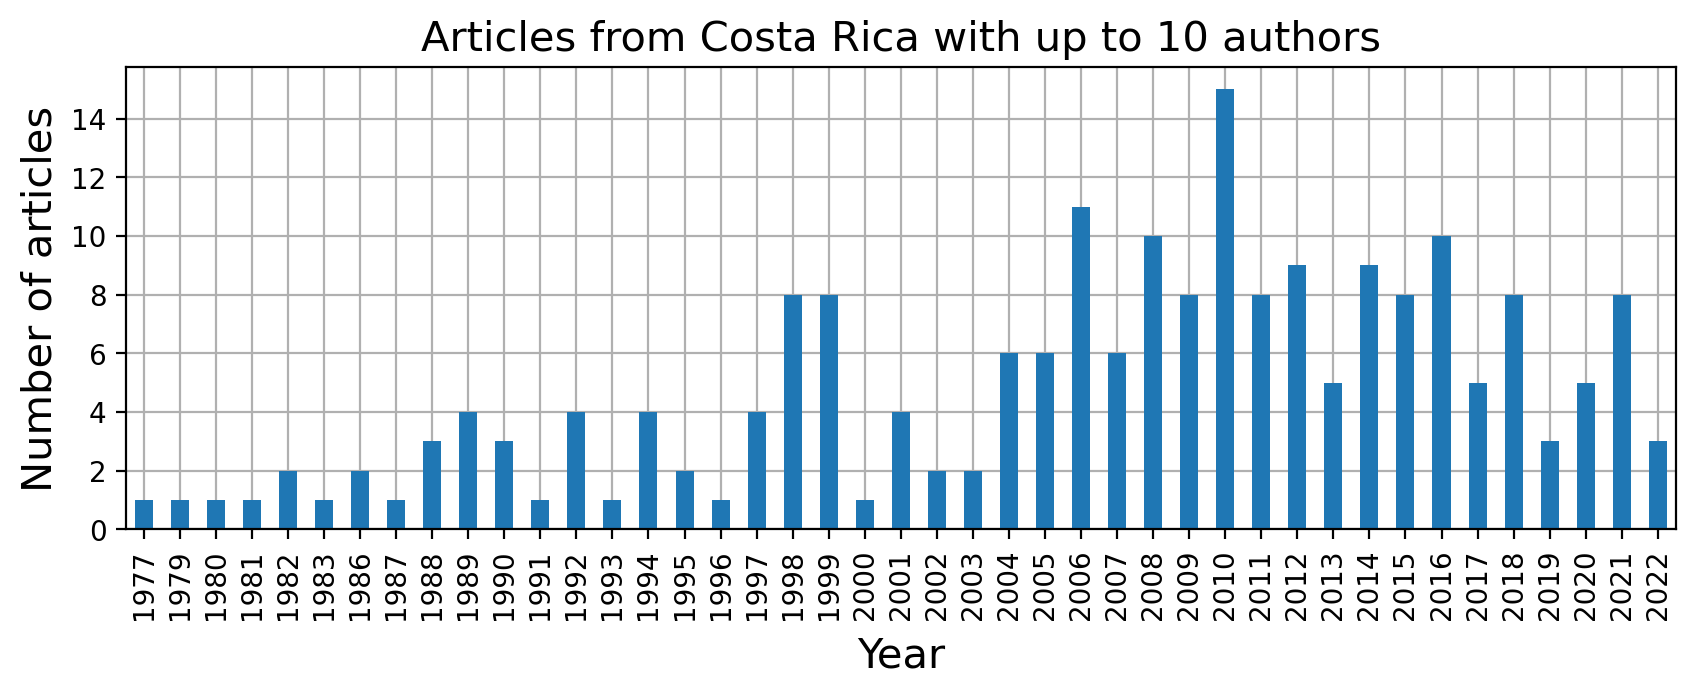

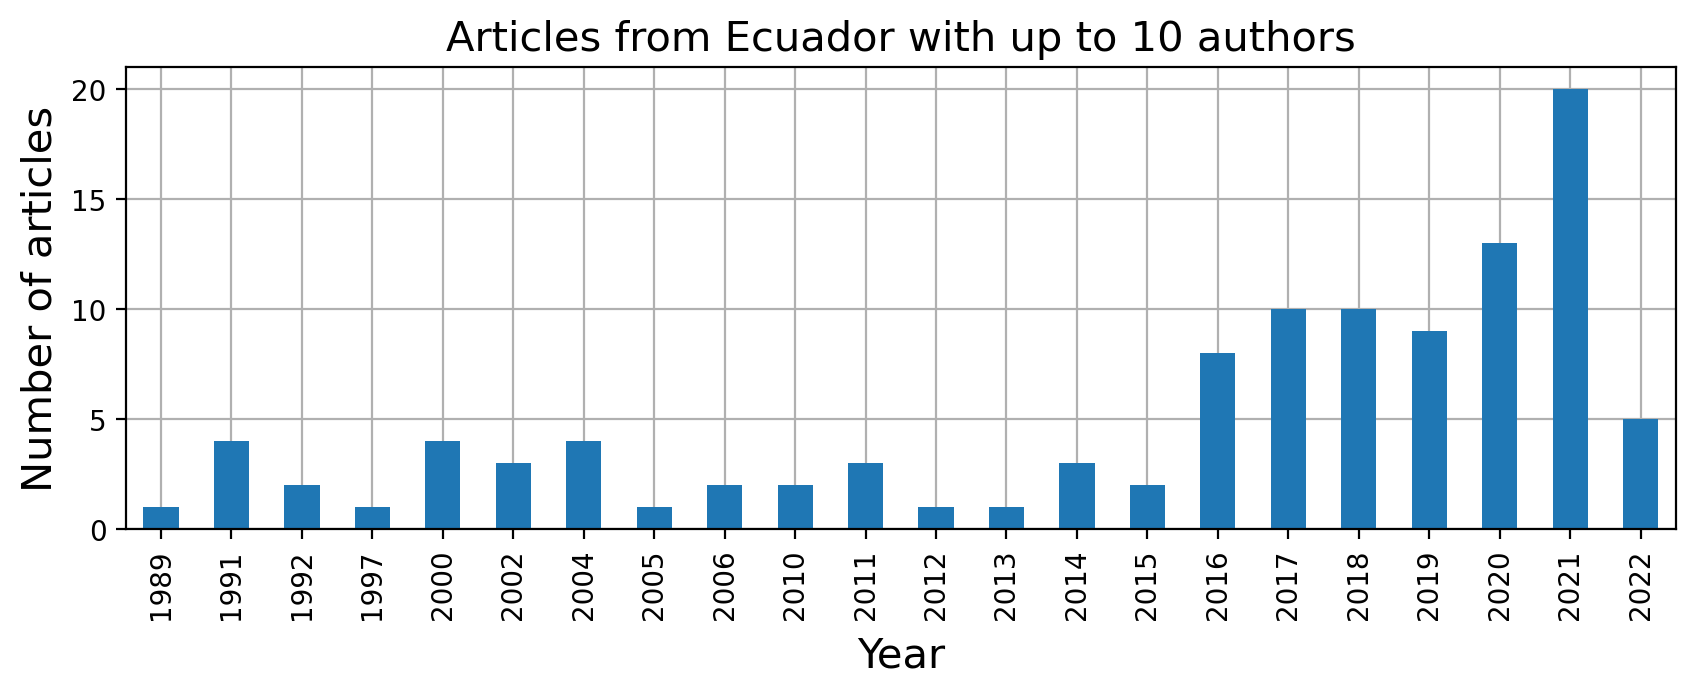

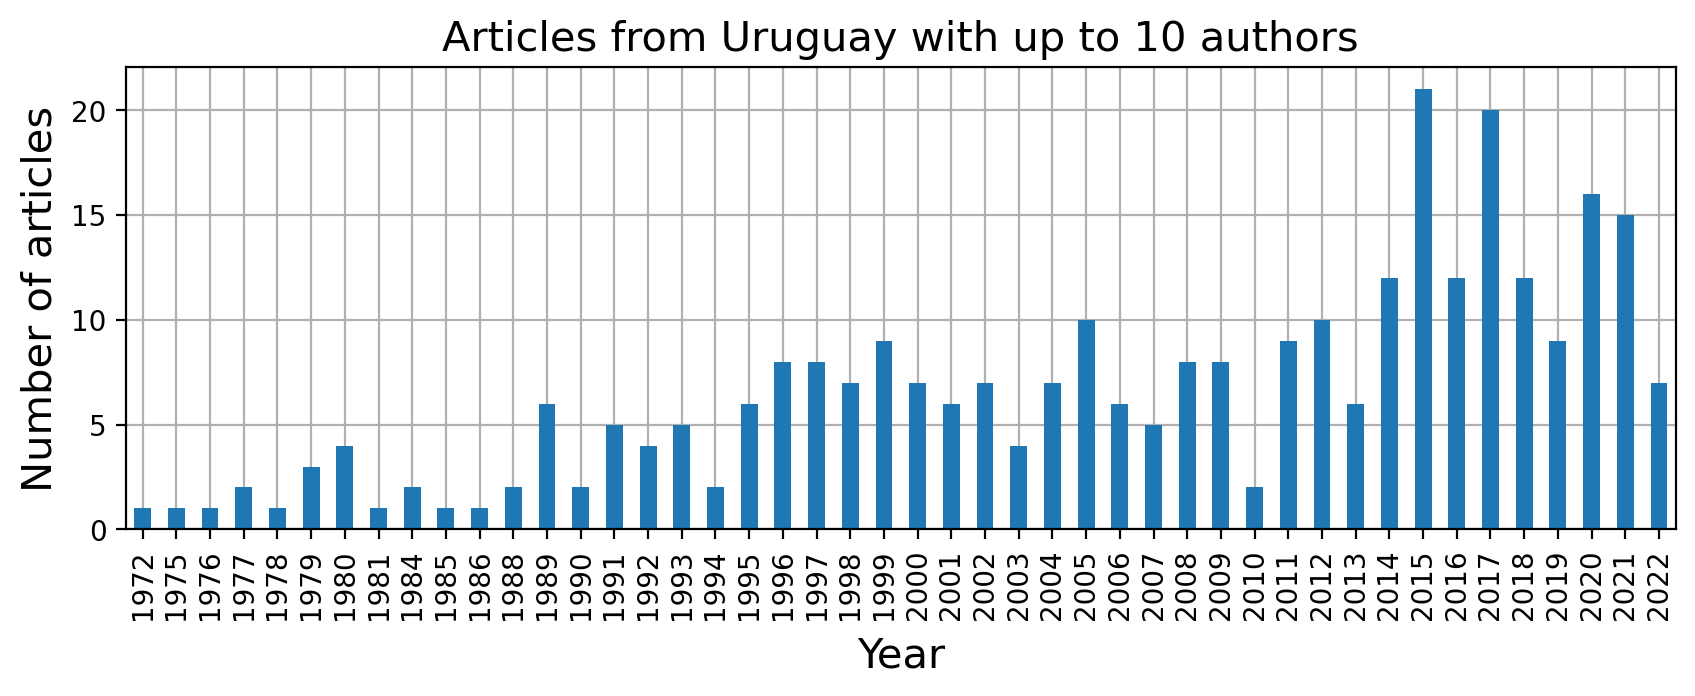

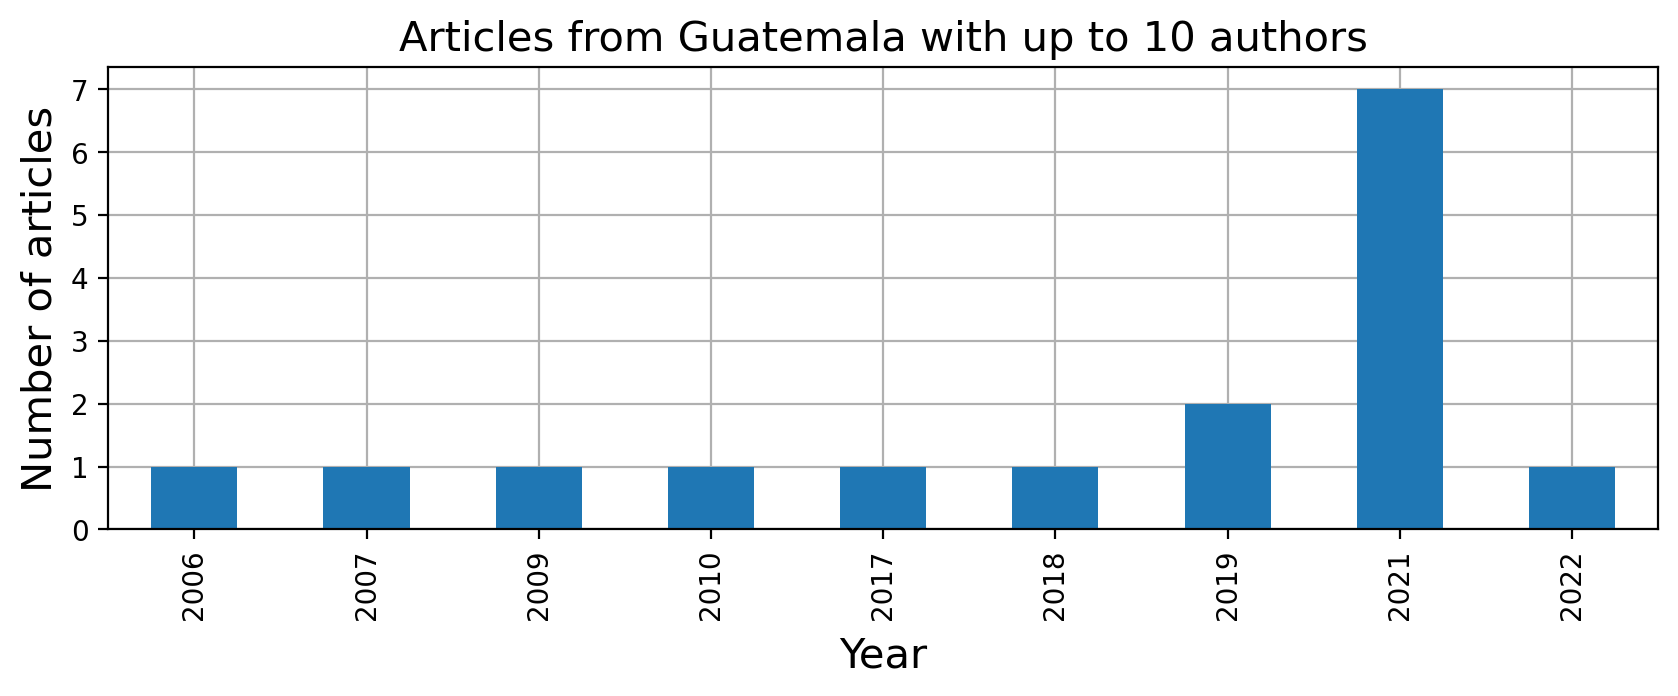

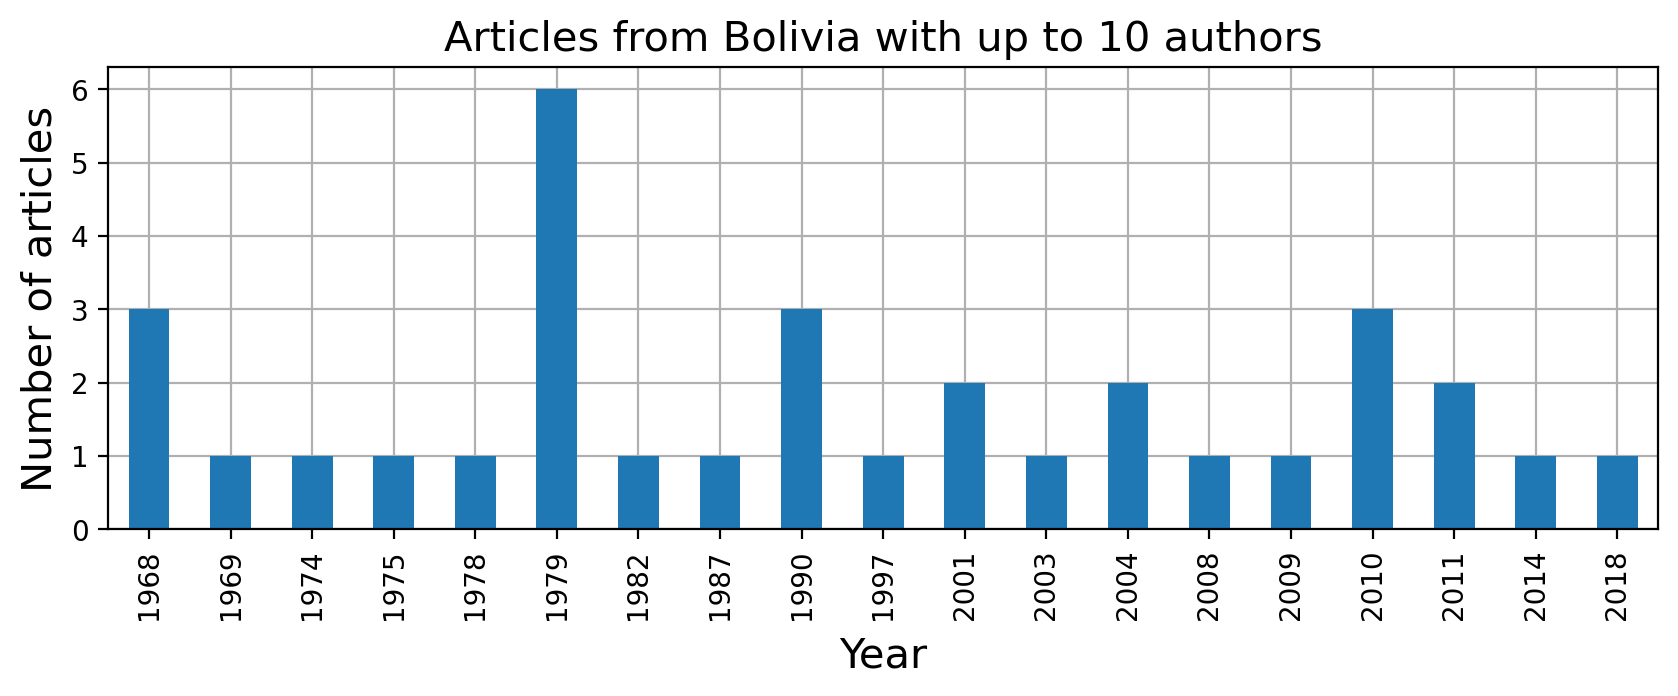

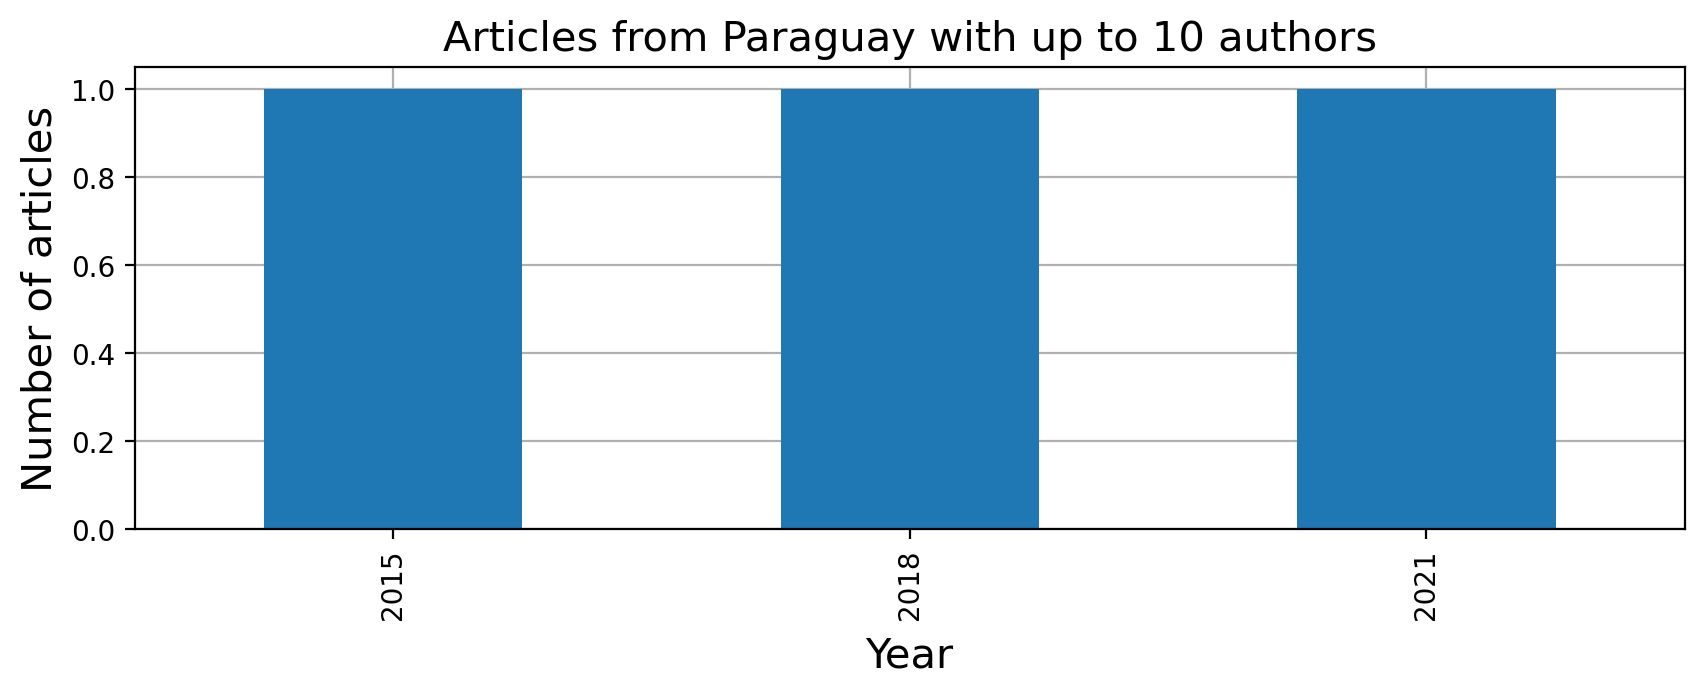

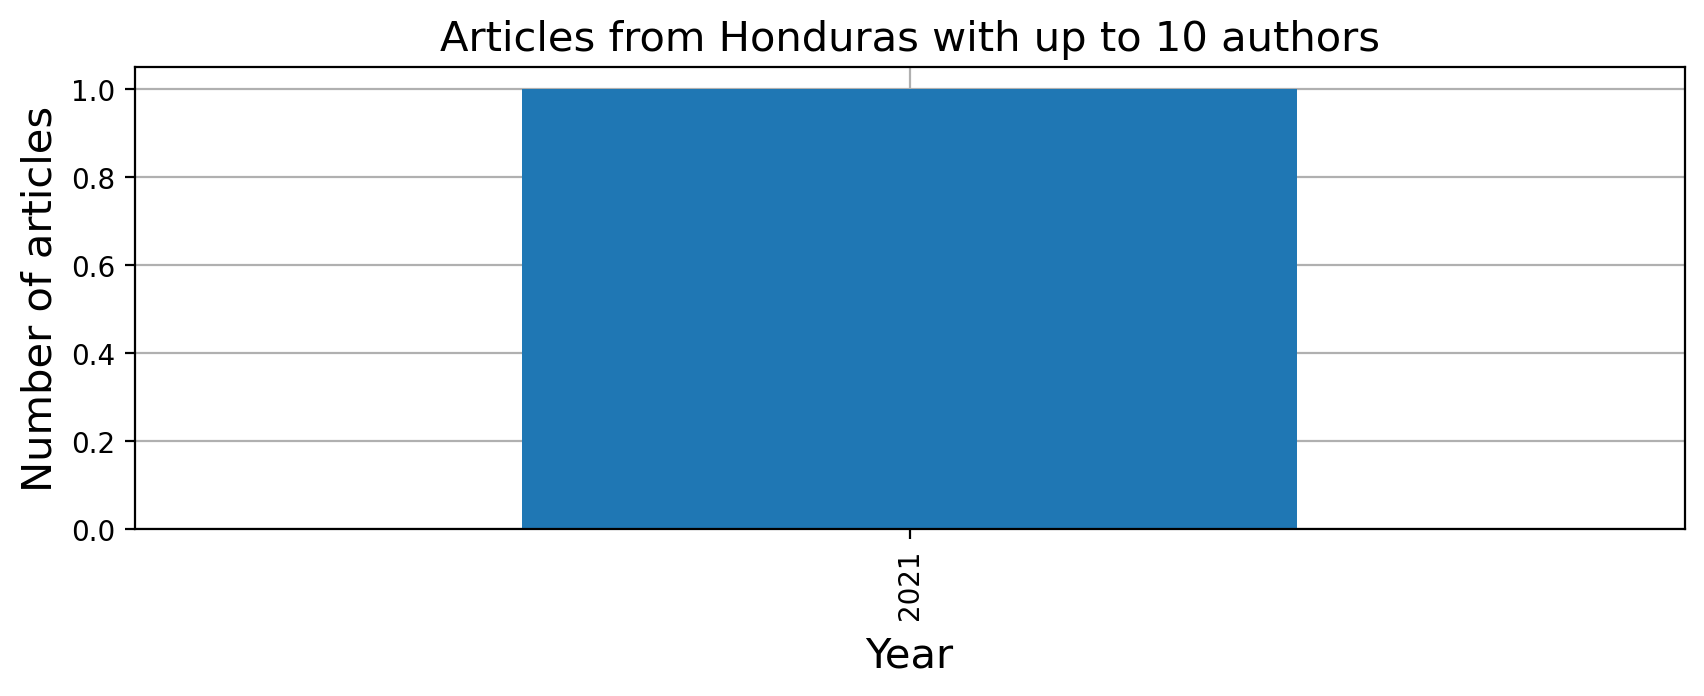

In [168]:
# Plot articles for all Latin America

for country in LA_countries:
    plot_articles_per_year(country)

In [169]:
# Get number of authors 

def get_number_authors(country):
    # import json
    db=pd.read_json('data/inspire_LA.json')
    # select country
    db=db[db['country']==country].reset_index(drop=True)
    # remove duplicate authors according to `author_id`
    db = db.drop_duplicates(subset=['author_id'])
    number_of_authors = len(db.index)
    print(f"{country}: {number_of_authors} authors.")
    
for country in LA_countries:
    get_number_authors(country)

Brazil: 2782 authors.
Mexico: 1253 authors.
Venezuela: 103 authors.
Chile: 815 authors.
Argentina: 773 authors.
Peru: 44 authors.
Colombia: 218 authors.
Cuba: 53 authors.
Costa Rica: 13 authors.
Ecuador: 28 authors.
Uruguay: 27 authors.
Guatemala: 13 authors.
Bolivia: 14 authors.
Paraguay: 3 authors.
Honduras: 1 authors.


In [170]:
db=pd.read_json('data/inspire_LA.json')
db.head()

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1030697,"{'value': 'Vasconcellos, Cesar Augusto Zen', '...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'C.A.Z.Vasconcellos.1', 'schema': '...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
1,1259398,"{'value': 'Hess, Peter Otto', 'preferred_name'...",903003,"[{'value': 'grid.9486.3', 'schema': 'GRID'}, {...",Mexico,Mexico U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'P.O.Hess.1', 'schema': 'INSPIRE BA...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
2,1007059,"{'value': 'Hadjimichef, Dimiter', 'preferred_n...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,"[{'value': 'dimiter.hadjimichef@ufrgs.br', 'cu...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0003-4999-7625', 'schema': 'O...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
3,1030698,"{'value': 'Bodmann, B.E.J.', 'preferred_name':...",906126,"[{'value': 'INST-43427', 'schema': 'SPIRES'}]",Brazil,"Santa Maria U., Brazil",[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'B.E.J.Bodmann.1', 'schema': 'INSPI...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
4,1969239,"{'value': 'Razeira, Moisés'}",911369,"[{'value': 'INST-102865', 'schema': 'SPIRES'}]",Brazil,"Alegrete, Brazil",[],[],"[{'value': 'M.Razeira.1', 'schema': 'INSPIRE B...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."


In [171]:
# Get number of papers  

import pandas as pd

def number_of_papers(name_of_country):
    """
    This is a function
    """
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==name_of_country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    print(f"{name_of_country} = {dp.shape[0]} papers.")
    pass
  
for country in LA_countries:
    number_of_papers(country)

Brazil = 21578 papers.
Mexico = 8289 papers.
Venezuela = 855 papers.
Chile = 4976 papers.
Argentina = 4862 papers.
Peru = 129 papers.
Colombia = 1037 papers.
Cuba = 414 papers.
Costa Rica = 205 papers.
Ecuador = 112 papers.
Uruguay = 301 papers.
Guatemala = 16 papers.
Bolivia = 33 papers.
Paraguay = 3 papers.
Honduras = 1 papers.


In [172]:
# Get number of citations  

def number_of_citations(name_of_country):
    """
    This is a function
    """
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==name_of_country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    citations = dp['citation_count'].sum()
    print(f"{name_of_country} = {citations} citations")
    pass

for country in LA_countries:
    number_of_citations(country)

Brazil = 345902 citations
Mexico = 135046 citations
Venezuela = 25893 citations
Chile = 130995 citations
Argentina = 101086 citations
Peru = 1389 citations
Colombia = 18118 citations
Cuba = 6406 citations
Costa Rica = 7876 citations
Ecuador = 1675 citations
Uruguay = 7919 citations
Guatemala = 109 citations
Bolivia = 50 citations
Paraguay = 43 citations
Honduras = 0 citations


In [173]:
# Obtain name and mail address for active authors
# in Chile

# load the json file
db=pd.read_json('data/inspire_LA.json')
# select Chile as country
db=db[db['country']=='Colombia'].reset_index(drop=True)
# remove duplicate authors according to `author_id`
db = db.drop_duplicates(subset=['author_id'])
print(len(db.index))
db.head()

218


,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1116570,"{'value': 'Vanegas Forero, David', 'name_varia...",1693598,[],Colombia,Medellin U.,"[{'value': 'dvanegas@udem.edu.co', 'current': ...","[{'rank': 'JUNIOR', 'record': {'$ref': 'https:...","[{'value': '0000-0003-4139-5670', 'schema': 'O...",[],"[{'inst_id': 903186, 'recid': 1893571, 'year':..."
1,998583,"{'value': 'Martinez, Roberto Enrique', 'prefer...",906485,"[{'value': 'grid.10689.36', 'schema': 'GRID'},...",Colombia,"Colombia, U. Natl.","[{'value': 'remartinezm@unal.edu.co', 'current...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...","[{'value': 'R.E.Martinez.2', 'schema': 'INSPIR...",[],"[{'inst_id': 903186, 'recid': 654322, 'year': ..."
2,991924,"{'value': 'Restrepo Quintero, Diego Alejandro'...",903906,"[{'value': 'grid.412881.6', 'schema': 'GRID'},...",Colombia,Antioquia U.,"[{'value': 'restrepo@udea.edu.co', 'current': ...","[{'rank': 'SENIOR', 'hidden': False, 'record':...","[{'value': 'D.Restrepo.1', 'schema': 'INSPIRE ...",[],"[{'inst_id': 903186, 'recid': 794086, 'year': ..."
3,1040301,"{'value': 'Sanchez, Luis A.', 'preferred_name'...",905834,"[{'value': 'INST-39942', 'schema': 'SPIRES'}]",Colombia,"Natl. U. of Columbia, Medellin",[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'L.A.Sanchez.1', 'schema': 'INSPIRE...",[],"[{'inst_id': 903186, 'recid': 1210130, 'year':..."
4,1283803,"{'value': 'Quiroga-Nuñez, Luis Henry', 'name_v...",906485,"[{'value': 'grid.10689.36', 'schema': 'GRID'},...",Colombia,"Colombia, U. Natl.","[{'value': 'lquiroga@nrao.edu', 'current': Tru...","[{'rank': 'POSTDOC', 'record': {'$ref': 'https...","[{'value': 'L.H.Quiroga.Nunez.1', 'schema': 'I...",[],"[{'inst_id': 903186, 'recid': 1210130, 'year':..."


# h-index per country

In [174]:
db=pd.read_json('data/inspire_LA.json')
db.head()

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1030697,"{'value': 'Vasconcellos, Cesar Augusto Zen', '...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'C.A.Z.Vasconcellos.1', 'schema': '...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
1,1259398,"{'value': 'Hess, Peter Otto', 'preferred_name'...",903003,"[{'value': 'grid.9486.3', 'schema': 'GRID'}, {...",Mexico,Mexico U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'P.O.Hess.1', 'schema': 'INSPIRE BA...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
2,1007059,"{'value': 'Hadjimichef, Dimiter', 'preferred_n...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,"[{'value': 'dimiter.hadjimichef@ufrgs.br', 'cu...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0003-4999-7625', 'schema': 'O...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
3,1030698,"{'value': 'Bodmann, B.E.J.', 'preferred_name':...",906126,"[{'value': 'INST-43427', 'schema': 'SPIRES'}]",Brazil,"Santa Maria U., Brazil",[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'B.E.J.Bodmann.1', 'schema': 'INSPI...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
4,1969239,"{'value': 'Razeira, Moisés'}",911369,"[{'value': 'INST-102865', 'schema': 'SPIRES'}]",Brazil,"Alegrete, Brazil",[],[],"[{'value': 'M.Razeira.1', 'schema': 'INSPIRE B...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."


In [175]:
def hIndex(citations):
    """
    https://github.com/kamyu104/LeetCode/blob/master/Python/h-index.py
    :type citations: List[int]
    :rtype: int
    
    # Given an array of citations (each citation is a non-negative integer)
    # of a researcher, write a function to compute the researcher's h-index.
    #
    # According to the definition of h-index on Wikipedia: 
    # "A scientist has index h if h of his/her N papers have
    # at least h citations each, and the other N − h papers have
    # no more than h citations each."
    #
    # For example, given citations = [3, 0, 6, 1, 5], 
    # which means the researcher has 5 papers in total
    # and each of them had received 3, 0, 6, 1, 5 citations respectively. 
    # Since the researcher has 3 papers with at least 3 citations each and 
    # the remaining two with no more than 3 citations each, his h-index is 3.
    #
    # Note: If there are several possible values for h, the maximum one is taken as the h-index.
    """
    import builtins
    sum=builtins.sum
    return sum(x >= i + 1 for i, x in enumerate(sorted(  list(citations), reverse=True)))

In [176]:
dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)

h5-Index

In [177]:
hIndex( dp[dp.year.apply(lambda y: eval(y) if y else 0
            ).apply(lambda y: y>time.localtime().tm_year-6 and
                               y<time.localtime().tm_year-1)
           ].citation_count)

80

In [178]:
def h_index_country(country):
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==country].reset_index(drop=True)
    dp=pd.DataFrame(db.papers.apply(pd.Series).stack().to_list()).drop_duplicates(subset='recid').reset_index(drop=True)
    ans = hIndex(dp.citation_count)
    return ans


In [179]:
for country in LA_countries:
    print(f"{country} h-index = {h_index_country(country)}")


Brazil h-index = 172
Mexico h-index = 127
Venezuela h-index = 75
Chile h-index = 135
Argentina h-index = 124
Peru h-index = 22
Colombia h-index = 62
Cuba h-index = 34
Costa Rica h-index = 43
Ecuador h-index = 23
Uruguay h-index = 48
Guatemala h-index = 5
Bolivia h-index = 4
Paraguay h-index = 2
Honduras h-index = 0


# Statistics per capita

In [180]:
import numpy as np

"""
Arrays account for 
- Argentina
- Brazil
- Mexico
- Venezuela
- Chile
- Peru
- Colombia
- Cuba
- Costa Rica
- Ecuador
- Uruguay
- Cuba
- Bolivia
- Paraguay
- Honduras
"""

populations = [45.606, 213.993, 130.262,
              28.705, 19.212, 33.359,
              51.266, 11.318, 5.139,
              17.888, 3.485, 18.250, 
              11.833, 7.220, 10.063]

In [181]:
publications = [4862, 21578 , 8289, 
                855, 4976, 129, 
                1037, 414, 205, 
                112, 301, 16, 
                33, 3, 1]

In [182]:
publications_pc = np.divide(publications, populations) 
print(publications_pc)

[1.06608780e+02 1.00835074e+02 6.36332929e+01 2.97857516e+01
 2.59004789e+02 3.86702239e+00 2.02278313e+01 3.65789009e+01
 3.98910294e+01 6.26118068e+00 8.63701578e+01 8.76712329e-01
 2.78881095e+00 4.15512465e-01 9.93739442e-02]


In [183]:
authors = [773 , 2782, 1253 , 
           103 , 815 , 44 , 
           218 , 53 , 13 , 
           28 , 27 , 13 , 
           14 , 3 , 1]

In [184]:
authors_pc = np.divide(authors, populations)
print(authors_pc)

[16.94952419 13.00042525  9.6190754   3.58822505 42.42140329  1.31898438
  4.25233098  4.68280615  2.52967503  1.56529517  7.74748924  0.71232877
  1.18313192  0.41551247  0.09937394]


In [185]:
citations = [101086, 345902, 135046, 
             25893, 130995, 1389,
             18118, 6406, 7876,
             1675, 7919, 109, 
             50, 43, 0]

In [186]:
citations_pc = np.divide(citations, populations)
print(citations_pc)

[2.21650660e+03 1.61641736e+03 1.03672598e+03 9.02037972e+02
 6.81839475e+03 4.16379388e+01 3.53411618e+02 5.66001060e+02
 1.53259389e+03 9.36381932e+01 2.27230990e+03 5.97260274e+00
 4.22547114e+00 5.95567867e+00 0.00000000e+00]


In [187]:
h_index = [124, 172, 127, 
           75, 135, 22, 
           62, 34, 43, 
           23, 48, 5, 
           4, 2, 0]

In [188]:
h_index_pc = np.divide(h_index, populations)
print(h_index_pc)

[ 2.71894049  0.80376461  0.97495816  2.61278523  7.02685821  0.65949219
  1.20937854  3.00406432  8.36738665  1.28577818 13.7733142   0.2739726
  0.33803769  0.27700831  0.        ]


# Extra plots

In [189]:
gdp = [0.46, 1.21, 0.28, 0.34, 0.34,
       0.16, 0.32, 0.55, 0.37, 0.44, 
       0.48, 0.03, 0.28, 0.14, 0.04]


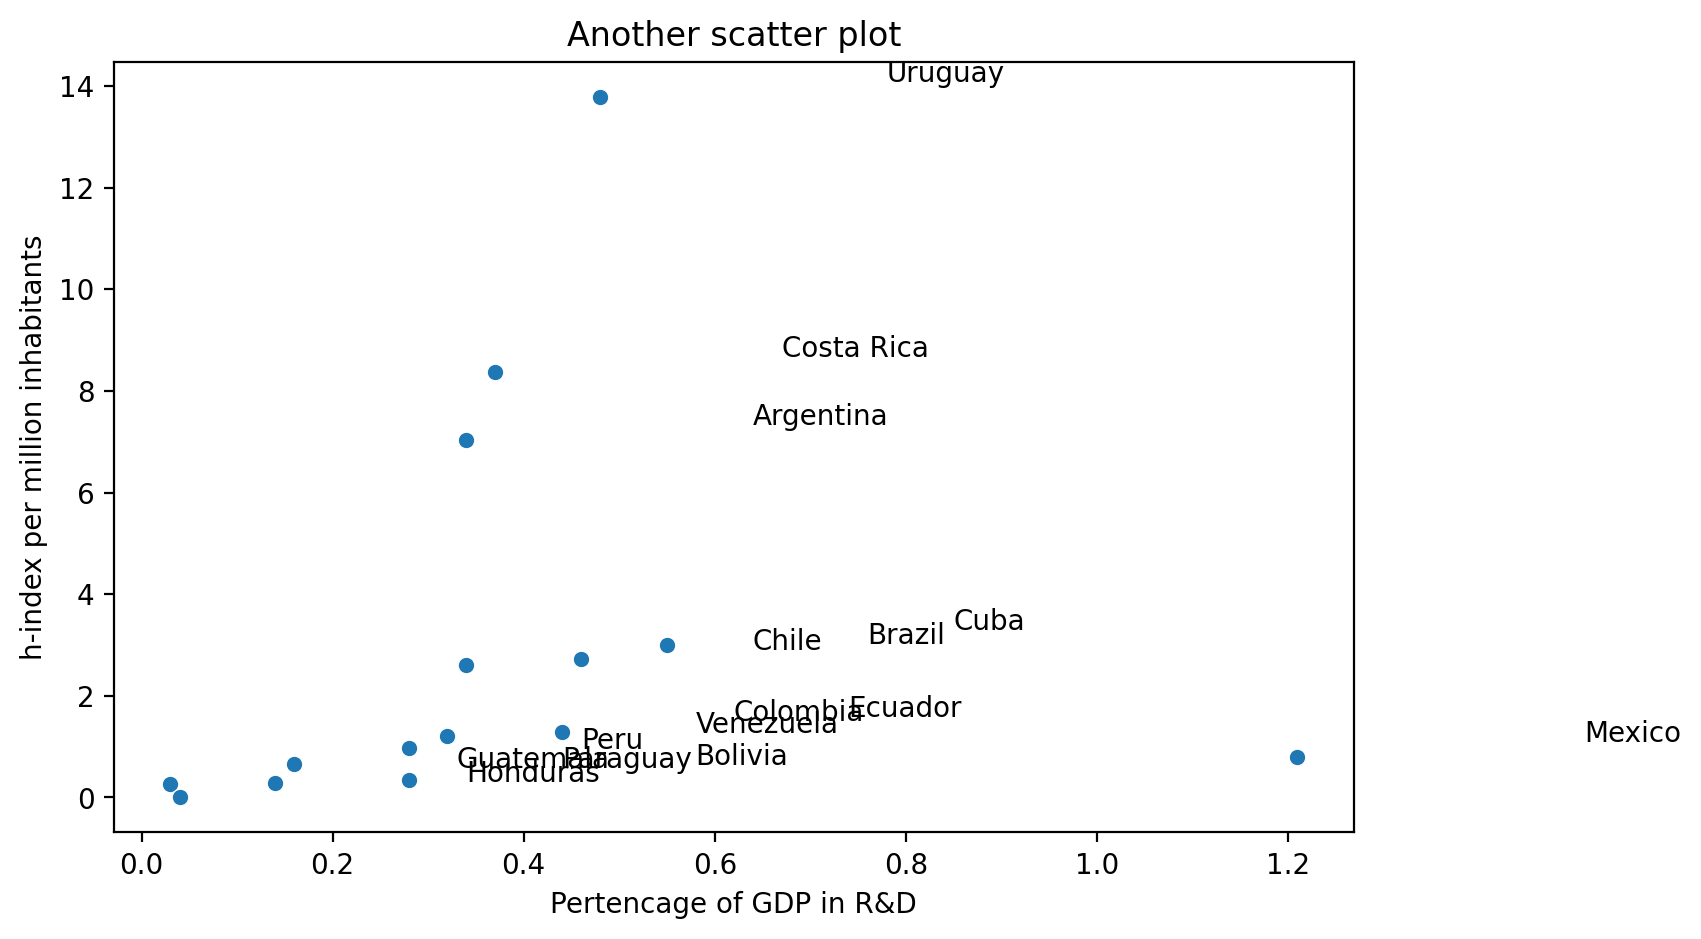

In [191]:
plt.figure(figsize=(8,5))

sns.scatterplot(x=gdp,y=h_index_pc)

for i in range(len(gdp)):
    plt.text(x=gdp[i]+0.3,y=h_index_pc[i]+0.3, s=LA_countries[i])

plt.title('Another scatter plot') #title
plt.xlabel('Pertencage of GDP in R&D') #x label
plt.ylabel('h-index per million inhabitants') #y label

plt.show()

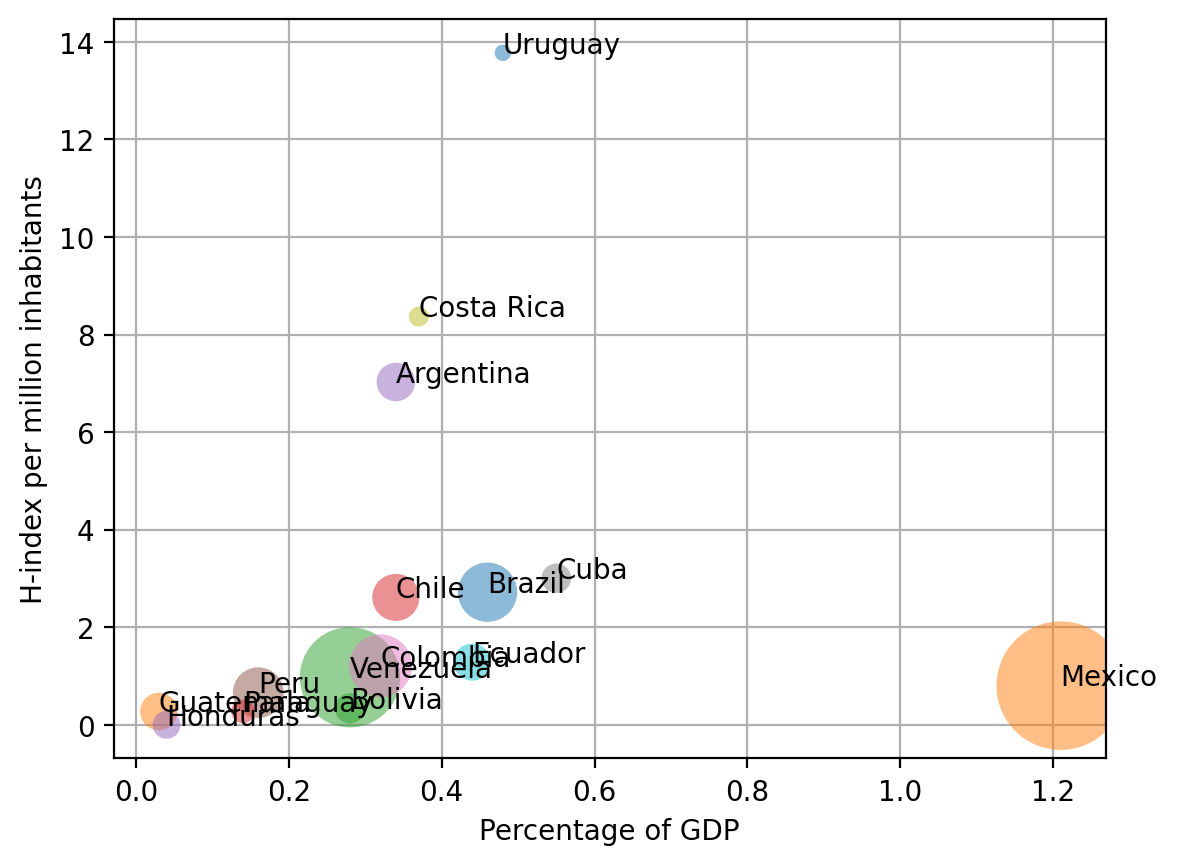

In [218]:
fig, ax = plt.subplots()

data = list(zip(LA_countries, gdp, h_index_pc, populations))

for datapoint in data:
    x = datapoint[1]
    y = datapoint[2]
    r = datapoint[3]  #radius
    ax.scatter(x, y, label=datapoint[0], s=10*r,
               alpha=0.5, edgecolors='none')
    ax.annotate(datapoint[0], (x, y))
    
    # format
    ax.set_xlabel('Percentage of GDP')
    ax.set_ylabel('H-index per million inhabitants')

ax.grid(True)
ax.set_axisbelow(True)
fig.savefig('hello.pdf')

# Mexico is left out with these limits
#ax.set_xlim([0, 0.6])

plt.show()

In [219]:
print(h_index_pc)

[ 2.71894049  0.80376461  0.97495816  2.61278523  7.02685821  0.65949219
  1.20937854  3.00406432  8.36738665  1.28577818 13.7733142   0.2739726
  0.33803769  0.27700831  0.        ]


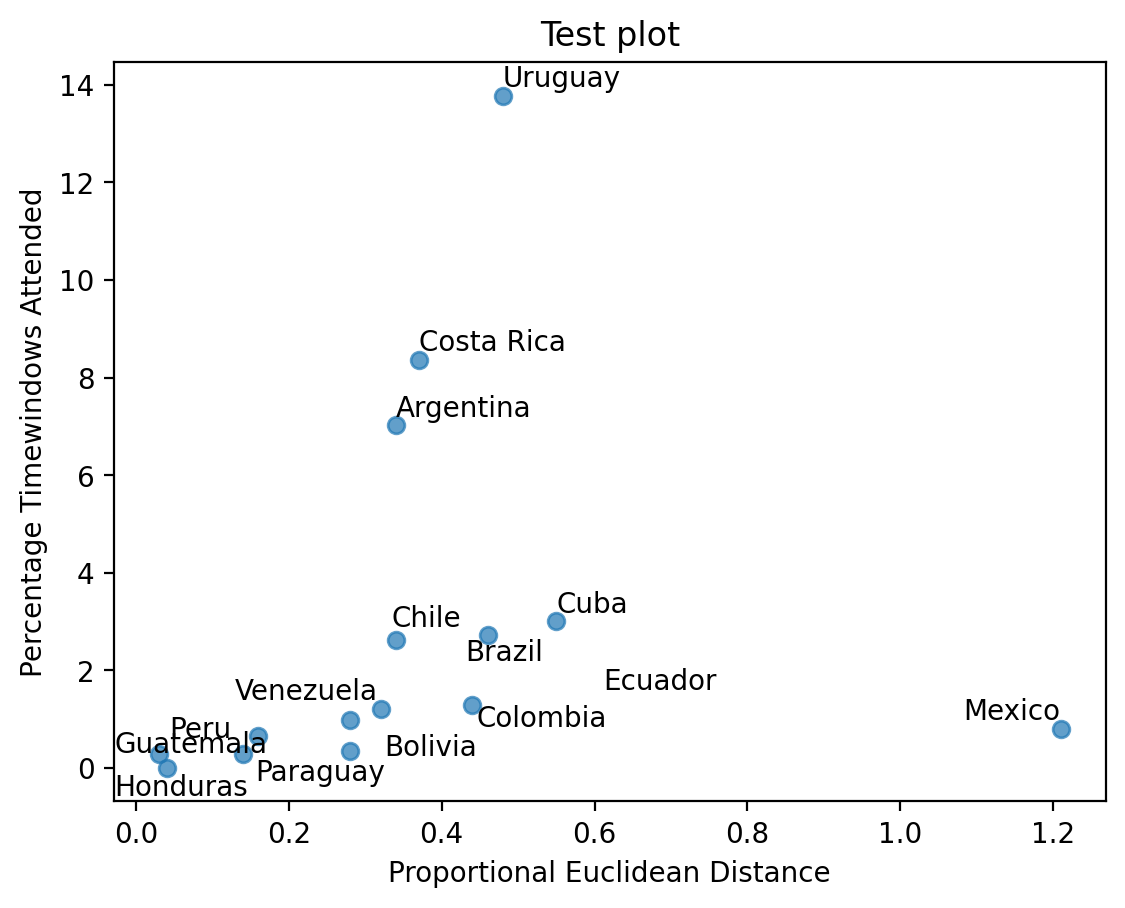

In [204]:
from adjustText import adjust_text

text = LA_countries
eucs = gdp
covers = h_index_pc

plt.scatter(eucs, covers, alpha=0.7)
texts = []
for x, y, s in zip(eucs, covers, text):
    texts.append(plt.text(x, y, s))

plt.xlabel("Proportional Euclidean Distance")
plt.ylabel("Percentage Timewindows Attended")
plt.title("Test plot")
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.show()